### Import Packages



In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
pd.set_option('display.max_columns', 300) #Setting column display limit
plt.style.use('ggplot') #Applying style to graphs

### Load DataSet

#### Application Data

In [88]:
app = pd.read_csv('application_data.csv')

#### Previous Application Data

In [89]:
papp = pd.read_csv('previous_application.csv')

### Top 5 Rows of the Dataset

In [90]:
app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

#### Dimension

In [91]:
app.shape

(307511, 122)

### Checking Missing Values

In [92]:
app.isnull().sum()/app.shape[0] * 100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

### Names of the Columns where null values is greater than 40

In [93]:
removeCol = app.columns[app.isnull().sum()/app.shape[0]*100 > 40]
removeCol

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

### Dropping the null values

In [94]:
app.drop(columns=removeCol,axis = 1, inplace= True)

### Dimension of the Actual Dataset

In [95]:
app.shape

(307511, 73)

### Statistical Analysis

In [96]:
app.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  FLAG_EMP_PHONE  \
count      307511.000000    307511.000000  307511.000000   307511.000000   
mean        -4986.120328     -2994.202373       0.999997        0.819889   
std          3522.886321      1509.450419       0.001803        0.384280   
min        -24672.000000     -7197.000000       0.000000        0.000000   
25%         -7479.500000     -4299.000000       1.000000        1.000000   
50%         -4504.000000     -3254.000000       1.000000        1.000000   
75%         -2010.000000     -1720.000000       1.000000        1.000000   
max             0.000000         0.000000       1.000000        1.000000   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  \
count    307511.000000     307511.000000  307511.000000  307511.000000   
mean          0.199368          0.998133       0.281066       0.056720   
std           0.399526          0.043164       0.449521       0.231307   
min           0.000000          0.000000       0.000000       0.000000   
25%           0.000000          1.000000       0.000000       0.000000   
50%           0.000000          1.000000       0.000000       0.000000   
75%           0.000000          1.000000       1.000000       0.000000   
max           1.000000          1.000000       1.000000       1.000000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count    307509.000000         307511.000000                307511.000000   
mean          2.152665              2.052463                     2.031521   
std           0.910682              0.509034                     0.502737   
min           1.000000              1.000000                     1.000000   
25%           2.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           3.000000              2.000000                     2.000000   
max          20.000000              3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            307511.000000               307511.000000   
mean                 12.063419                    0.015144   
std                   3.26583

In [97]:
nullcol=app.isnull().sum()* 100/len(app)
nullcol[nullcol > 0].head(100)

AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
OCCUPATION_TYPE               31.345545
CNT_FAM_MEMBERS                0.000650
EXT_SOURCE_2                   0.214626
EXT_SOURCE_3                  19.825307
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DAYS_LAST_PHONE_CHANGE         0.000325
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

#### Checking DataTypes

In [98]:
app.dtypes.head(60)

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

## Data Visualization

#### Box Plot

<Axes: xlabel='TARGET', ylabel='AMT_ANNUITY'>

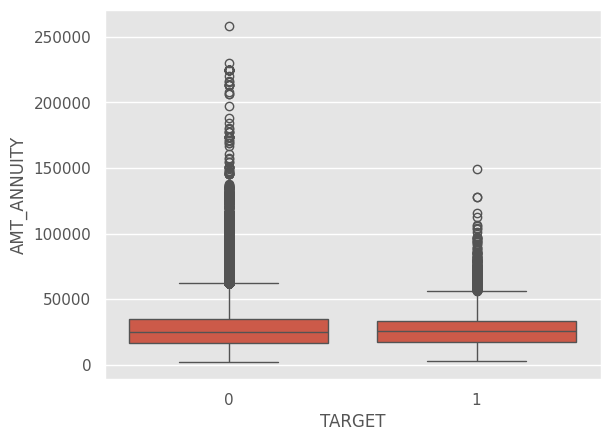

In [99]:
sns.boxplot( x=app['TARGET'],y=app['AMT_ANNUITY'])

In [100]:
print(app['TARGET'].value_counts())


TARGET
0    282686
1     24825
Name: count, dtype: int64


### Bar plot of Target Count

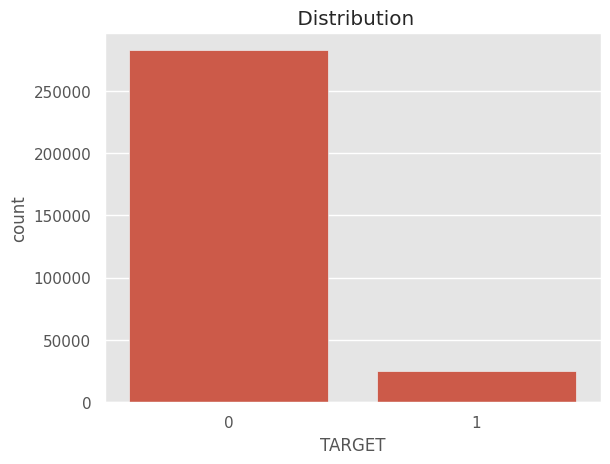

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'target' is your target variable
sns.countplot(x='TARGET', data=app)
plt.title(' Distribution')
plt.show()


## Imputation

In [102]:
app.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(app.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_YEAR

app.AMT_REQ_CREDIT_BUREAU_MON.fillna(app.AMT_REQ_CREDIT_BUREAU_MON.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_MON

app.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(app.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_WEEK

app.AMT_REQ_CREDIT_BUREAU_DAY.fillna(app.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_DAY

app.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(app.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_HOUR

app.AMT_REQ_CREDIT_BUREAU_QRT.fillna(app.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_QRT


In [103]:
(app.isnull().sum()/len(app)*100).sort_values(ascending=False)


OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
                                 ...    
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
TARGET                          0.000000
AMT_REQ_CREDIT_BUREAU_YEAR      0.000000
Length: 73, dtype: float64

In [104]:
app[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   DAYS_BIRTH              307511 non-null  int64  
 1   DAYS_EMPLOYED           307511 non-null  int64  
 2   DAYS_REGISTRATION       307511 non-null  float64
 3   DAYS_ID_PUBLISH         307511 non-null  int64  
 4   DAYS_LAST_PHONE_CHANGE  307510 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 11.7 MB


In [105]:
app['DAYS_BIRTH'] = app['DAYS_BIRTH'].abs()

In [106]:
app['DAYS_EMPLOYED'] = app['DAYS_EMPLOYED'].abs()

In [107]:
app['DAYS_REGISTRATION']= app['DAYS_ID_PUBLISH'].abs()

In [108]:
app['DAYS_LAST_PHONE_CHANGE']= app['DAYS_LAST_PHONE_CHANGE'].abs()
app['DAYS_ID_PUBLISH'] = app['DAYS_ID_PUBLISH'].abs()

In [109]:
app[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0             9461            637               2120             2120   
1            16765           1188                291              291   
2            19046            225               2531             2531   
3            19005           3039               2437             2437   
4            19932           3038               3458             3458   
...            ...            ...                ...              ...   
307506        9327            236               1982             1982   
307507       20775         365243               4090             4090   
307508       14966           7921               5150             5150   
307509       11961           4786                931              931   
307510       16856           1262                410              410   

        DAYS_LAST_PHONE_CHANGE  
0                       1134.0  
1                        828.0  
2                        815.0  
3                        617.0  
4                       1106.0  
...                        ...  
307506                   273.0  
307507                     0.0  
307508                  1909.0  
307509                   322.0  
307510                   787.0  

[307511 rows x 5 columns]

In [110]:
app[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].isnull().sum()/len(app) *100

DAYS_BIRTH                0.000000
DAYS_EMPLOYED             0.000000
DAYS_REGISTRATION         0.000000
DAYS_ID_PUBLISH           0.000000
DAYS_LAST_PHONE_CHANGE    0.000325
dtype: float64

In [111]:
app['FLAG_OWN_CAR'] = np.where(app['FLAG_OWN_CAR']=='Y', 1 , 0)
app['FLAG_OWN_REALTY'] = np.where(app['FLAG_OWN_REALTY']=='Y', 1 , 0)


In [112]:
app.head(50)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0       100002       1         Cash loans           M             0   
1       100003       0         Cash loans           F             0   
2       100004       0    Revolving loans           M             1   
3       100006       0         Cash loans           F             0   
4       100007       0         Cash loans           M             0   
5       100008       0         Cash loans           M             0   
6       100009       0         Cash loans           F             1   
7       100010       0         Cash loans           M             1   
8       100011       0         Cash loans           F             0   
9       100012       0    Revolving loans           M             0   
10      100014       0         Cash loans           F             0   
11      100015       0         Cash loans           F             0   
12      100016       0         Cash loans           F             0   
13      100017       0         Cash loans           M             1   
14      100018       0         Cash loans           F             0   
15      100019       0         Cash loans           M             1   
16      100020       0         Cash loans           M             0   
17      100021       0    Revolving loans           F             0   
18      100022       0    Revolving loans           F             0   
19      100023       0         Cash loans           F             0   
20      100024       0    Revolving loans           M             1   
21      100025       0         Cash loans           F             1   
22      100026       0         Cash loans           F             0   
23      100027       0         Cash loans           F             0   
24      100029       0         Cash loans           M             1   
25      100030       0         Cash loans           F             0   
26      100031       1         Cash loans           F             0   
27      100032       0         Cash loans           M             0   
28      100033       0         Cash loans           M             1   
29      100034       0    Revolving loans           M             0   
30      100035       0         Cash loans           F             0   
31      100036       0         Cash loans           F             0   
32      100037       0         Cash loans           F             0   
33      100039       0         Cash loans           M             1   
34      100040       0         Cash loans           F             0   
35      100041       0         Cash loans           F             0   
36      100043       0         Cash loans           F             0   
37      100044       0         Cash loans           M             0   
38      100045       0         Cash loans           F             0   
39      100046       0    Revolving loans           M             1   
40      100047       1         Cash loans           M             0   
41      100048       0         Cash loans           F             0   
42      100049       1         Cash loans           F             0   
43      100050       0         Cash loans           F             0   
44      100051       0         Cash loans           M             0   
45      100052       0    Revolving loans           F             0   
46      100053       0         Cash loans           F             0   
47      100054       0         Cash loans           F             0   
48      100055       0         Cash loans           F             0   
49      100056       0         Cash loans           M             1   

    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                 1             0        202500.000    406597.5      24700.5   
1                 0             0        270000.000   1293502.5      35698.5   
2                 1             0         67500.000    135000.0       6750.0   
3                 1             0        135000.000    312682.

In [113]:
(app.isnull().sum()/len(app) * 100).head(50)

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [114]:
app['AMT_GOODS_PRICE'].fillna(app['AMT_GOODS_PRICE'].median(),inplace=True)

In [115]:
app['EXT_SOURCE_3'].fillna(app['EXT_SOURCE_3'].median(),inplace=True)

In [116]:
app['EXT_SOURCE_2'].fillna(app['EXT_SOURCE_2'].median(),inplace=True)

In [117]:
app['AMT_INCOME_TYPE'] = pd.qcut(app['AMT_INCOME_TOTAL'],q=[0,0.2,0.5,0.8,0.95,1] ,labels=['very low','low','medium','high','very high'])
app['AMT_INCOME_TYPE'].head(10)

0       medium
1         high
2     very low
3          low
4          low
5     very low
6       medium
7    very high
8          low
9          low
Name: AMT_INCOME_TYPE, dtype: category
Categories (5, object): ['very low' < 'low' < 'medium' < 'high' < 'very high']

Checking the Distributaion of the Categorical Values

In [118]:
app.CODE_GENDER.value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

Column Gender is having XNA V

In [119]:
app.loc[app.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'
app.CODE_GENDER.value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

In [120]:
app.OCCUPATION_TYPE.value_counts().head(25)

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [121]:
app.ORGANIZATION_TYPE.value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In [122]:
app.NAME_INCOME_TYPE.value_counts().head(19)

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

In [123]:
app[['ORGANIZATION_TYPE','NAME_INCOME_TYPE']].head(30)


ORGANIZATION_TYPE      NAME_INCOME_TYPE
0   Business Entity Type 3               Working
1                   School         State servant
2               Government               Working
3   Business Entity Type 3               Working
4                 Religion               Working
5                    Other         State servant
6   Business Entity Type 3  Commercial associate
7                    Other         State servant
8                      XNA             Pensioner
9              Electricity               Working
10                Medicine               Working
11                     XNA             Pensioner
12  Business Entity Type 2               Working
13           Self-employed               Working
14       Transport: type 2               Working
15  Business Entity Type 2               Working
16              Government               Working
17            Construction               Working
18                 Housing               Working
19            Kindergarten         State servant
20           Self-employed               Working
21           Trade: type 7  Commercial associate
22           Self-employed               Working
23                     XNA             Pensioner
24  Business Entity Type 3               Working
25  Business Entity Type 3               Working
26  Business Entity Type 3               Working
27       Industry: type 11               Working
28                Military         State servant
29  Business Entity Type 3               Working

In [124]:
app['ORGANIZATION_TYPE'] = app['ORGANIZATION_TYPE'].replace('XNA', 'Pensioner')
app['OCCUPATION_TYPE'].fillna('Pensioner' , inplace = True)


In [125]:
imputerSocial = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']
for i in imputerSocial:
  app[i].fillna(0,inplace=True)

In [126]:
imputeRest = ['AMT_ANNUITY','NAME_TYPE_SUITE','CNT_FAM_MEMBERS','DAYS_LAST_PHONE_CHANGE']

for rest in imputeRest:
  app[rest].fillna(app[rest].mode()[0],inplace=True)

In [127]:
app.isnull().sum().head(50)

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

In [128]:
app.dtypes.head(50)

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                     int64
FLAG_OWN_REALTY                  int64
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION                int64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [129]:
Numeric_label= ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']
app[Numeric_label]=app[Numeric_label].apply(pd.to_numeric)

In [130]:
app.dtypes.head(50)

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                     int64
FLAG_OWN_REALTY                  int64
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION                int64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

#### Binning

In [131]:
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
Income_slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

app['AMT_INCOME_RANGE']=pd.cut(app['AMT_INCOME_TOTAL'],bins,labels=Income_slot)
app['AMT_INCOME_RANGE']

0         200000-225000
1         250000-275000
2           50000-75000
3         125000-150000
4         100000-125000
              ...      
307506    150000-175000
307507      50000-75000
307508    150000-175000
307509    150000-175000
307510    150000-175000
Name: AMT_INCOME_RANGE, Length: 307511, dtype: category
Categories (21, object): ['0-25000' < '25000-50000' < '50000-75000' < '75000,100000' < ... <
                          '425000-450000' < '450000-475000' < '475000-500000' < '500000 and above']

In [132]:
bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
Credit_slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

app['AMT_CREDIT_RANGE']=pd.cut(app['AMT_CREDIT'],bins=bins,labels=Credit_slots)
app['AMT_CREDIT_RANGE']

0            400000-450000
1         900000 and above
2                 0-150000
3            300000-350000
4            500000-550000
                ...       
307506       250000-300000
307507       250000-300000
307508       650000-700000
307509       350000-400000
307510       650000-700000
Name: AMT_CREDIT_RANGE, Length: 307511, dtype: category
Categories (17, object): ['0-150000' < '150000-200000' < '200000-250000' < '250000-300000' < ... <
                          '750000-800000' < '800000-850000' < '850000-900000' < '900000 and above']

In [133]:
app['AGE_GROUP']=pd.cut(app['DAYS_BIRTH'],bins=[19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])

Dropping the Column

In [134]:
flagdrop=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

app.drop(labels=flagdrop,axis=1,inplace=True)

In [135]:
app.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  int64   
 5   FLAG_OWN_REALTY              307511 non-null  int64   
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [136]:
numerical_col = app.select_dtypes(include='number').columns
len(numerical_col)

35

In [137]:
#The datatype of categorical columns below will be changed to category to suit univariate analysis
app['NAME_CONTRACT_TYPE'] = app['NAME_CONTRACT_TYPE'].astype('category')
app['CODE_GENDER'] = app['CODE_GENDER'].astype('category')
app['NAME_TYPE_SUITE'] = app['NAME_TYPE_SUITE'].astype('category')
app['NAME_INCOME_TYPE'] = app['NAME_INCOME_TYPE'].astype('category')
app['NAME_EDUCATION_TYPE'] = app['NAME_EDUCATION_TYPE'].astype('category')
app['NAME_FAMILY_STATUS'] = app['NAME_FAMILY_STATUS'].astype('category')
app['NAME_HOUSING_TYPE'] = app['NAME_HOUSING_TYPE'].astype('category')
app['OCCUPATION_TYPE'] = app['OCCUPATION_TYPE'].astype('category')
app['WEEKDAY_APPR_PROCESS_START'] = app['WEEKDAY_APPR_PROCESS_START'].astype('category')
app['ORGANIZATION_TYPE'] = app['ORGANIZATION_TYPE'].astype('category')

In [138]:
app['DAYS_BIRTH'] = (app['DAYS_BIRTH'] / 365).astype(int)
app['DAYS_BIRTH']

0         25
1         45
2         52
3         52
4         54
          ..
307506    25
307507    56
307508    41
307509    32
307510    46
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [139]:
app['DAYS_BIRTH']

0         25
1         45
2         52
3         52
4         54
          ..
307506    25
307507    56
307508    41
307509    32
307510    46
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [140]:
app['AGE_GROUP'] = pd.cut(app['DAYS_BIRTH'],bins=[19,25,35,60,100],labels=['very_young','young','middle age','senior citizen'])

In [141]:
app[['DAYS_BIRTH','AGE_GROUP']].head()

DAYS_BIRTH   AGE_GROUP
0          25  very_young
1          45  middle age
2          52  middle age
3          52  middle age
4          54  middle age

In [142]:
Target0=app.loc[app["TARGET"]==0]
Target1=app.loc[app["TARGET"]==1]

Imbalanced Percentage of the data

In [143]:
round(len(Target0)/len(Target1),2)


11.39

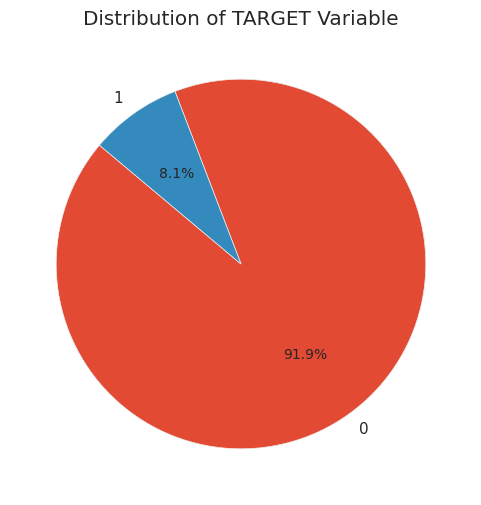

In [144]:
target_counts = app['TARGET'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of TARGET Variable')
plt.show()

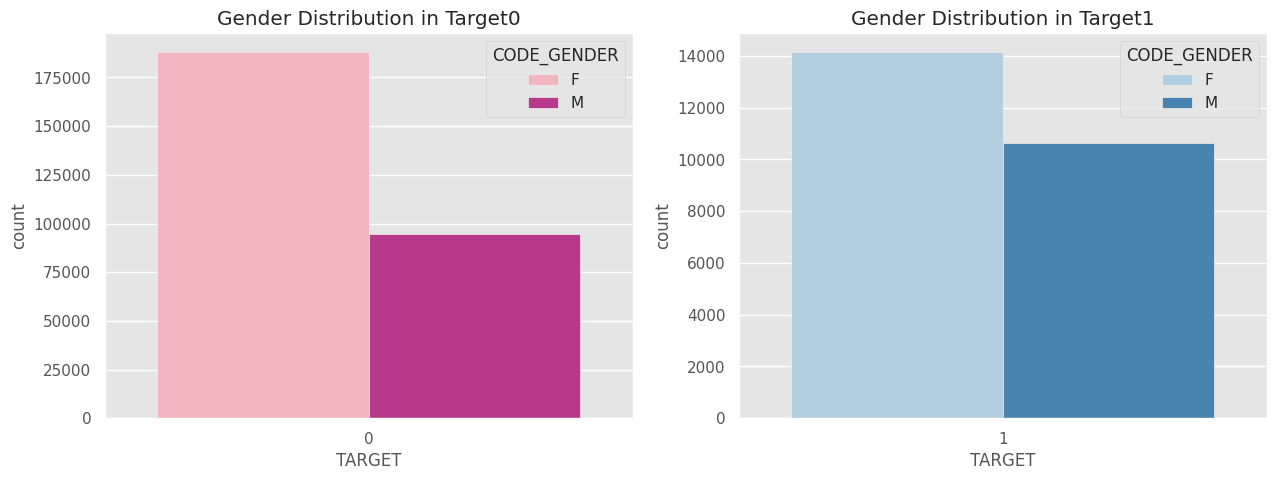

In [145]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target0, palette ='RdPu')
plt.title("Gender Distribution in Target0")
plt.subplot(122)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target1, palette = 'Blues')
plt.title("Gender Distribution in Target1")

plt.show()

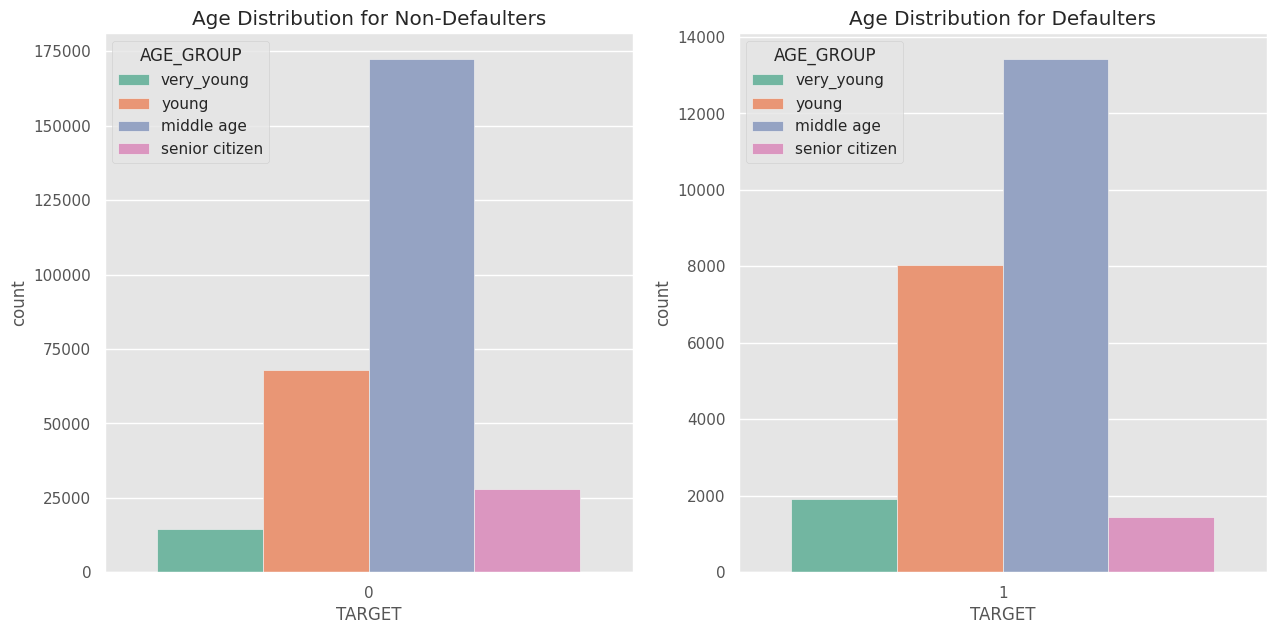

In [146]:
#AGE DISTRIBUTION FOR NON-DEFAULTERS AND DEFAULTERS

plt.figure(figsize=(15,7))
plt.subplot(121)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=Target0,palette='Set2')
plt.title("Age Distribution for Non-Defaulters")
plt.subplot(122)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=Target1,palette='Set2')
plt.title("Age Distribution for Defaulters")
plt.show()

In [147]:
categorical_col = list(app.select_dtypes(include= 'category').columns)


# Removing 'ORGANIZATION_TYPE','CODE_GENDER','AGE_GROUP' because we have already taken up the isights from  above plots

categorical_col.remove('ORGANIZATION_TYPE')
categorical_col.remove('CODE_GENDER')
categorical_col.remove('AGE_GROUP')

categorical_col #Checking after removing columns

['NAME_CONTRACT_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'AMT_INCOME_TYPE',
 'AMT_INCOME_RANGE',
 'AMT_CREDIT_RANGE']

In [148]:
def uni(col):
    sns.set(style="darkgrid")
    plt.figure(figsize=(40,20))


    plt.subplot(1,2,1)
    sns.distplot(Target0[col], color="g" )
    plt.yscale('linear')
    plt.xlabel(col, fontsize= 30, fontweight="bold")
    plt.ylabel('Non Payment Difficulties', fontsize= 30, fontweight="bold")                    #Target 0
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)




    plt.subplot(1,2,2)
    sns.distplot(Target1[col], color="r")
    plt.yscale('linear')
    plt.xlabel(col, fontsize= 30, fontweight="bold")
    plt.ylabel('Payment Difficulties', fontsize= 30, fontweight="bold")                       # Target 1
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)

    plt.show();

<ipython-input-148-46950d9ac816>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-148-46950d9ac816>:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




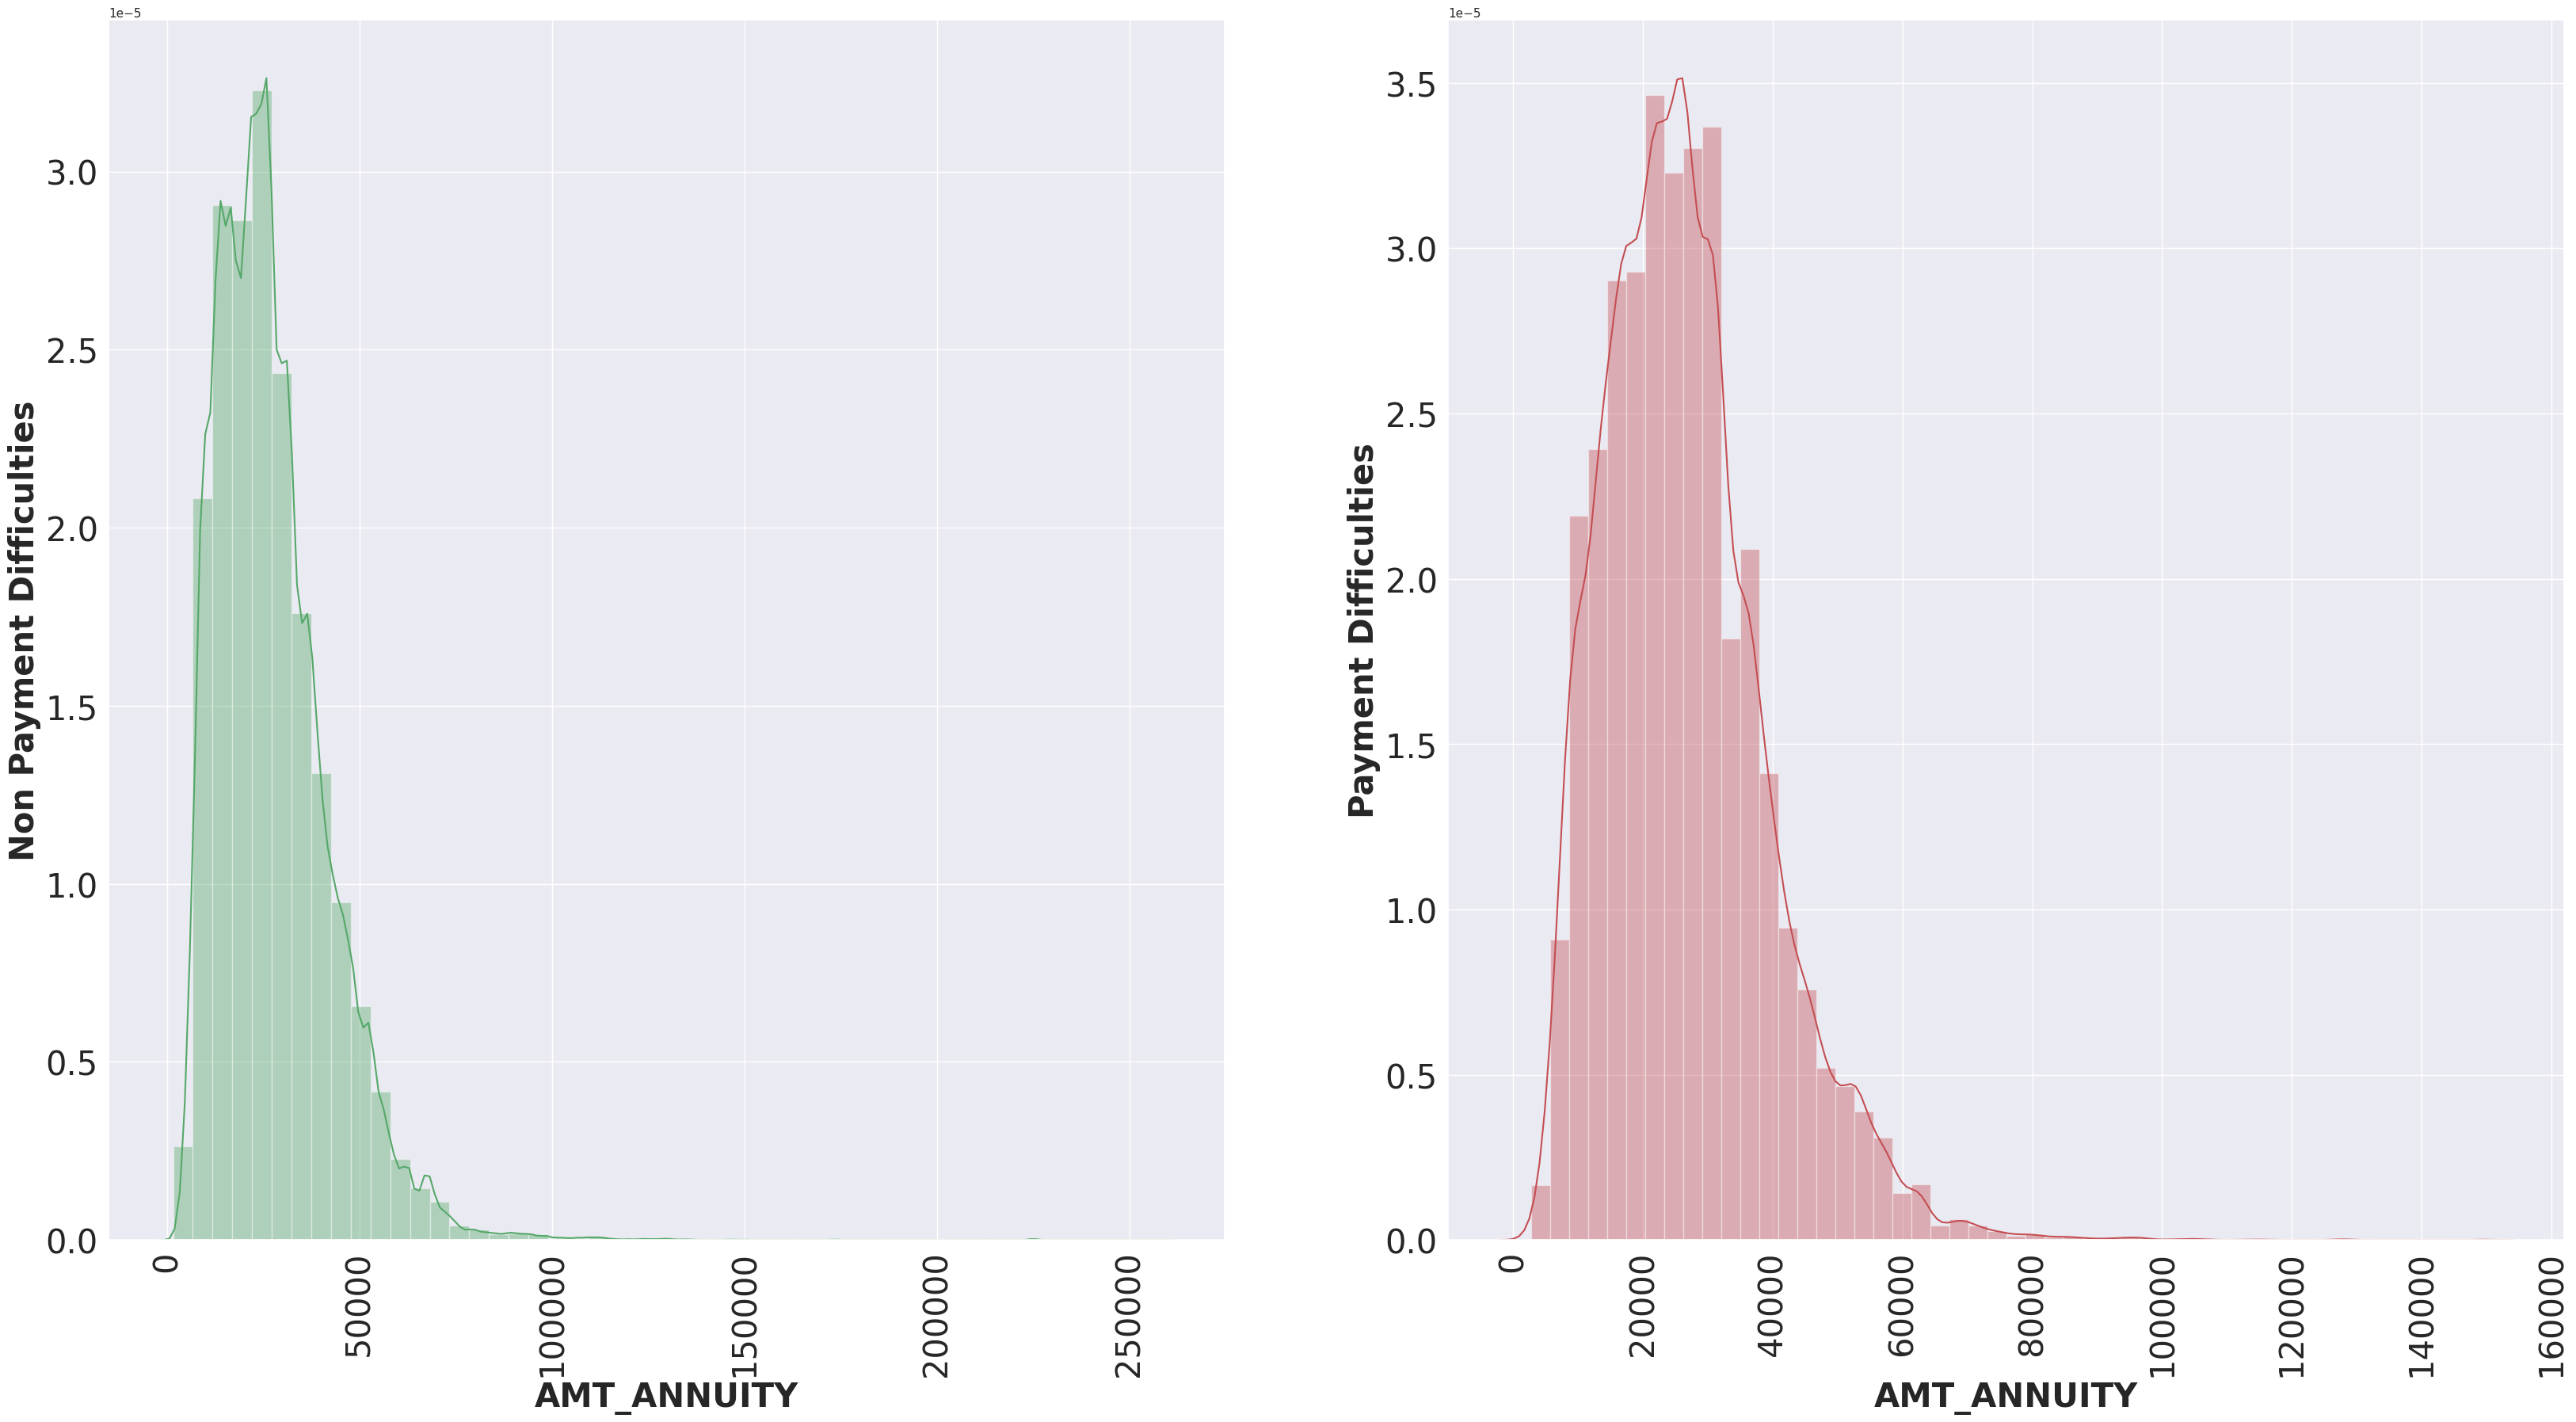

In [149]:
uni(col='AMT_ANNUITY')

<ipython-input-148-46950d9ac816>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-148-46950d9ac816>:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




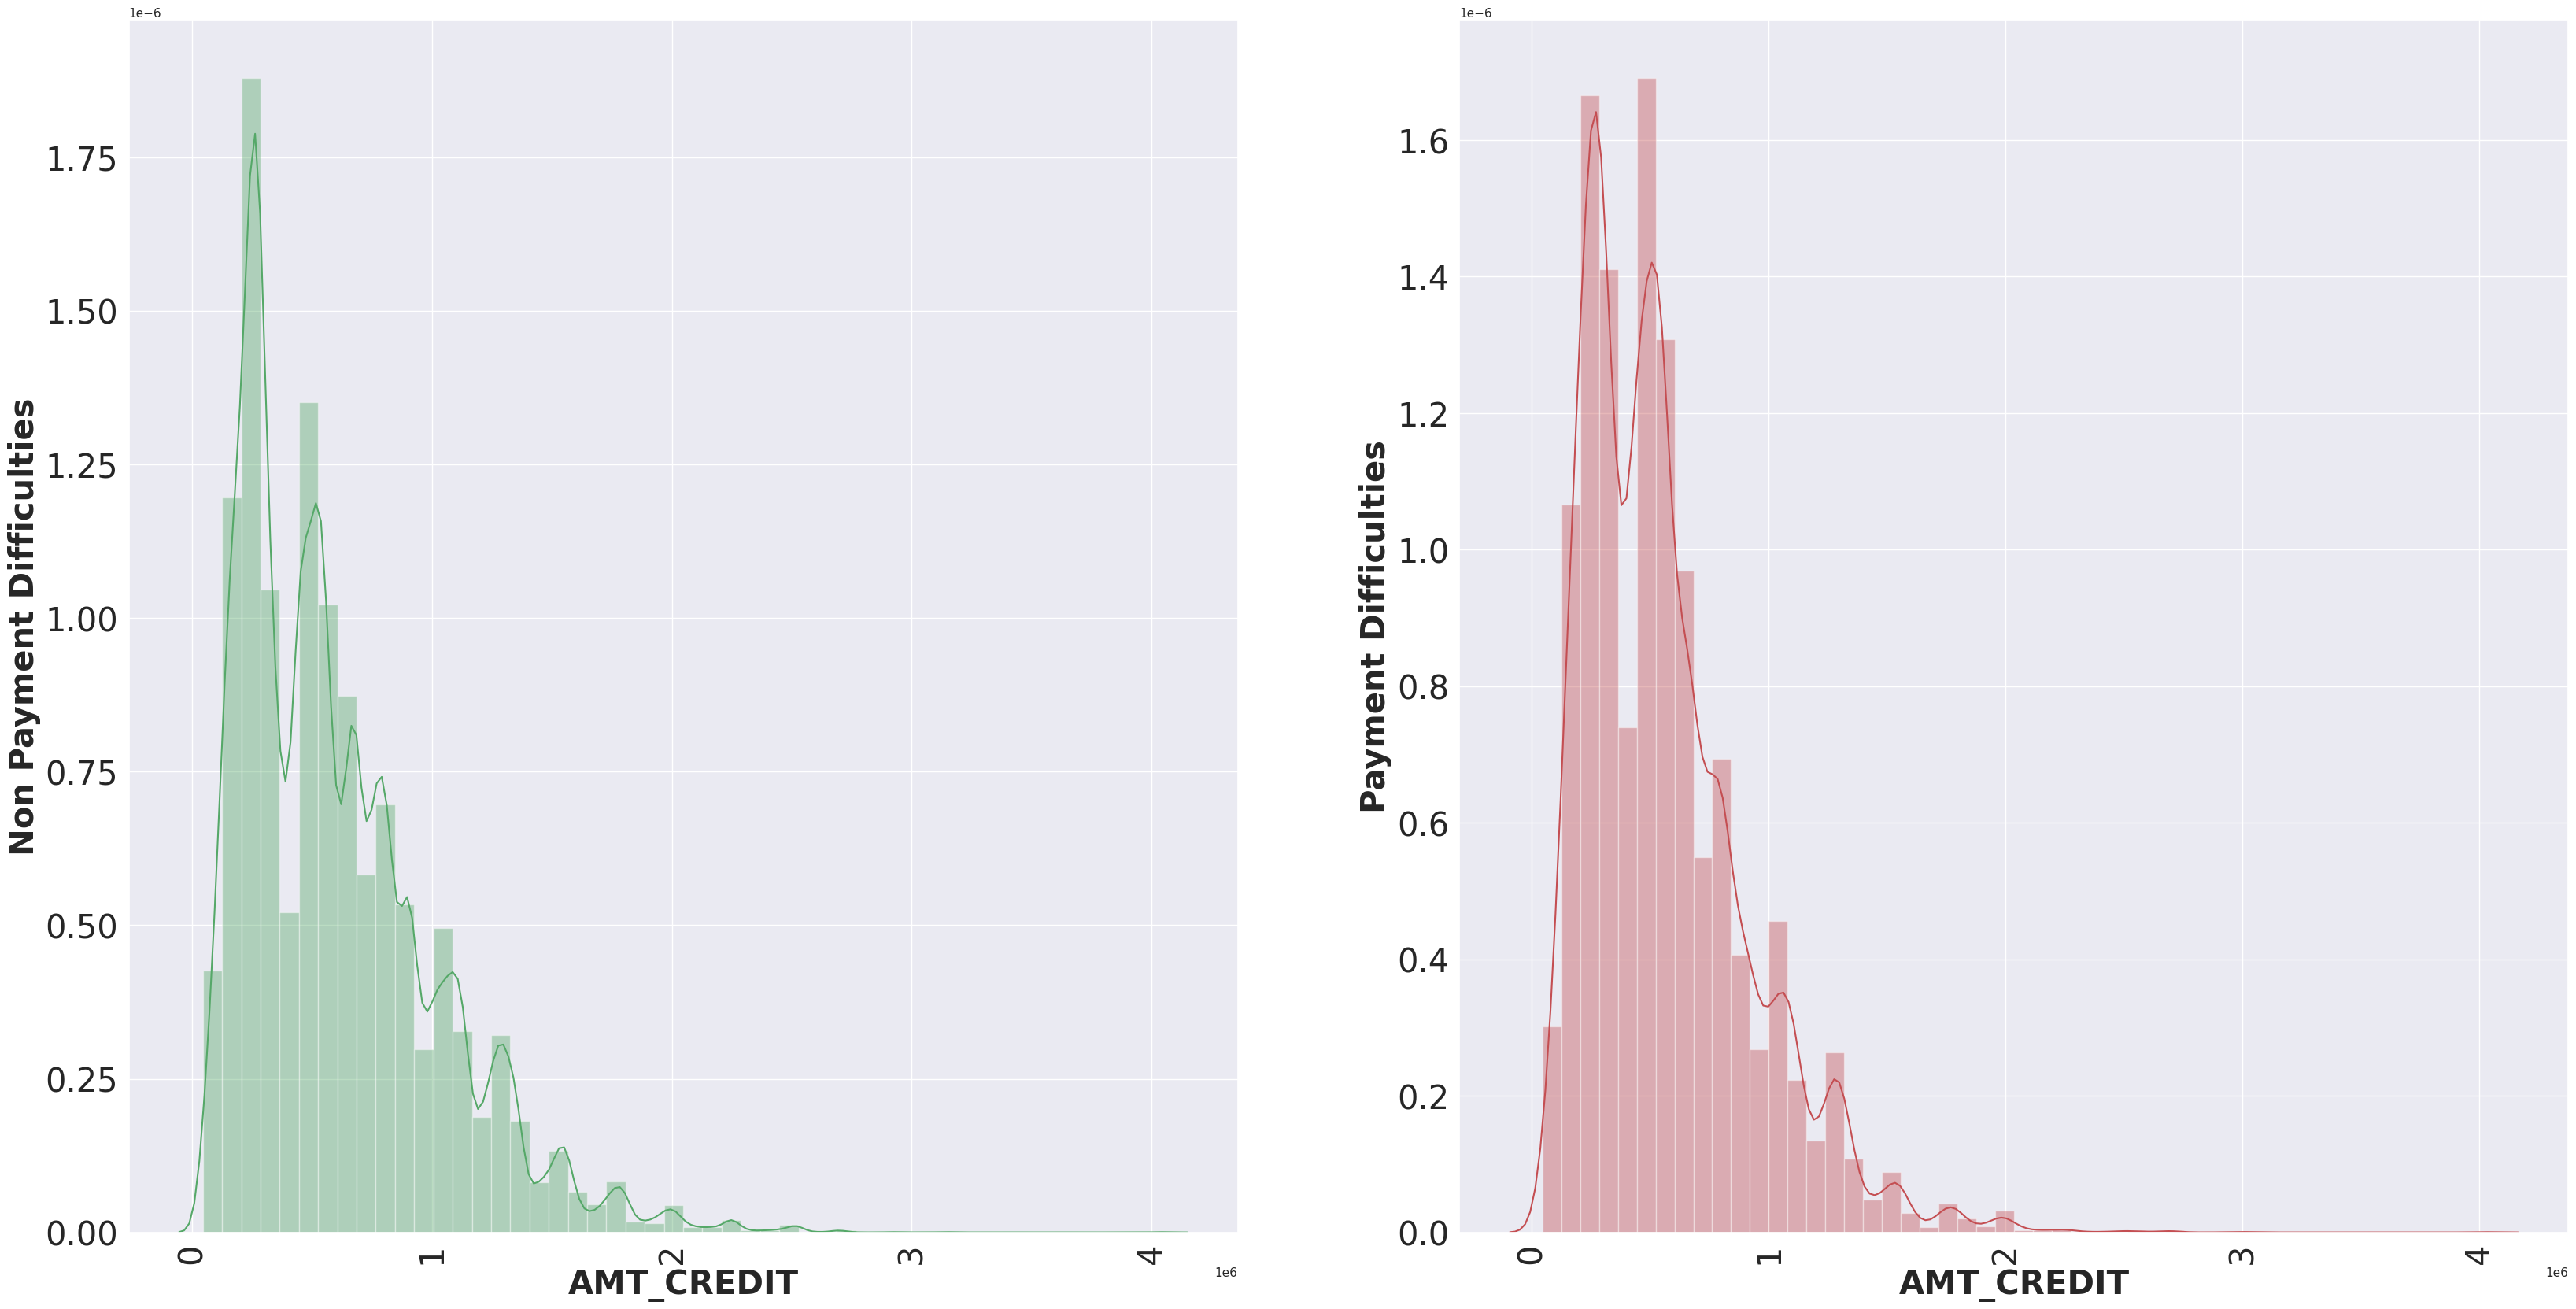

In [150]:
uni(col='AMT_CREDIT')

<ipython-input-148-46950d9ac816>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-148-46950d9ac816>:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




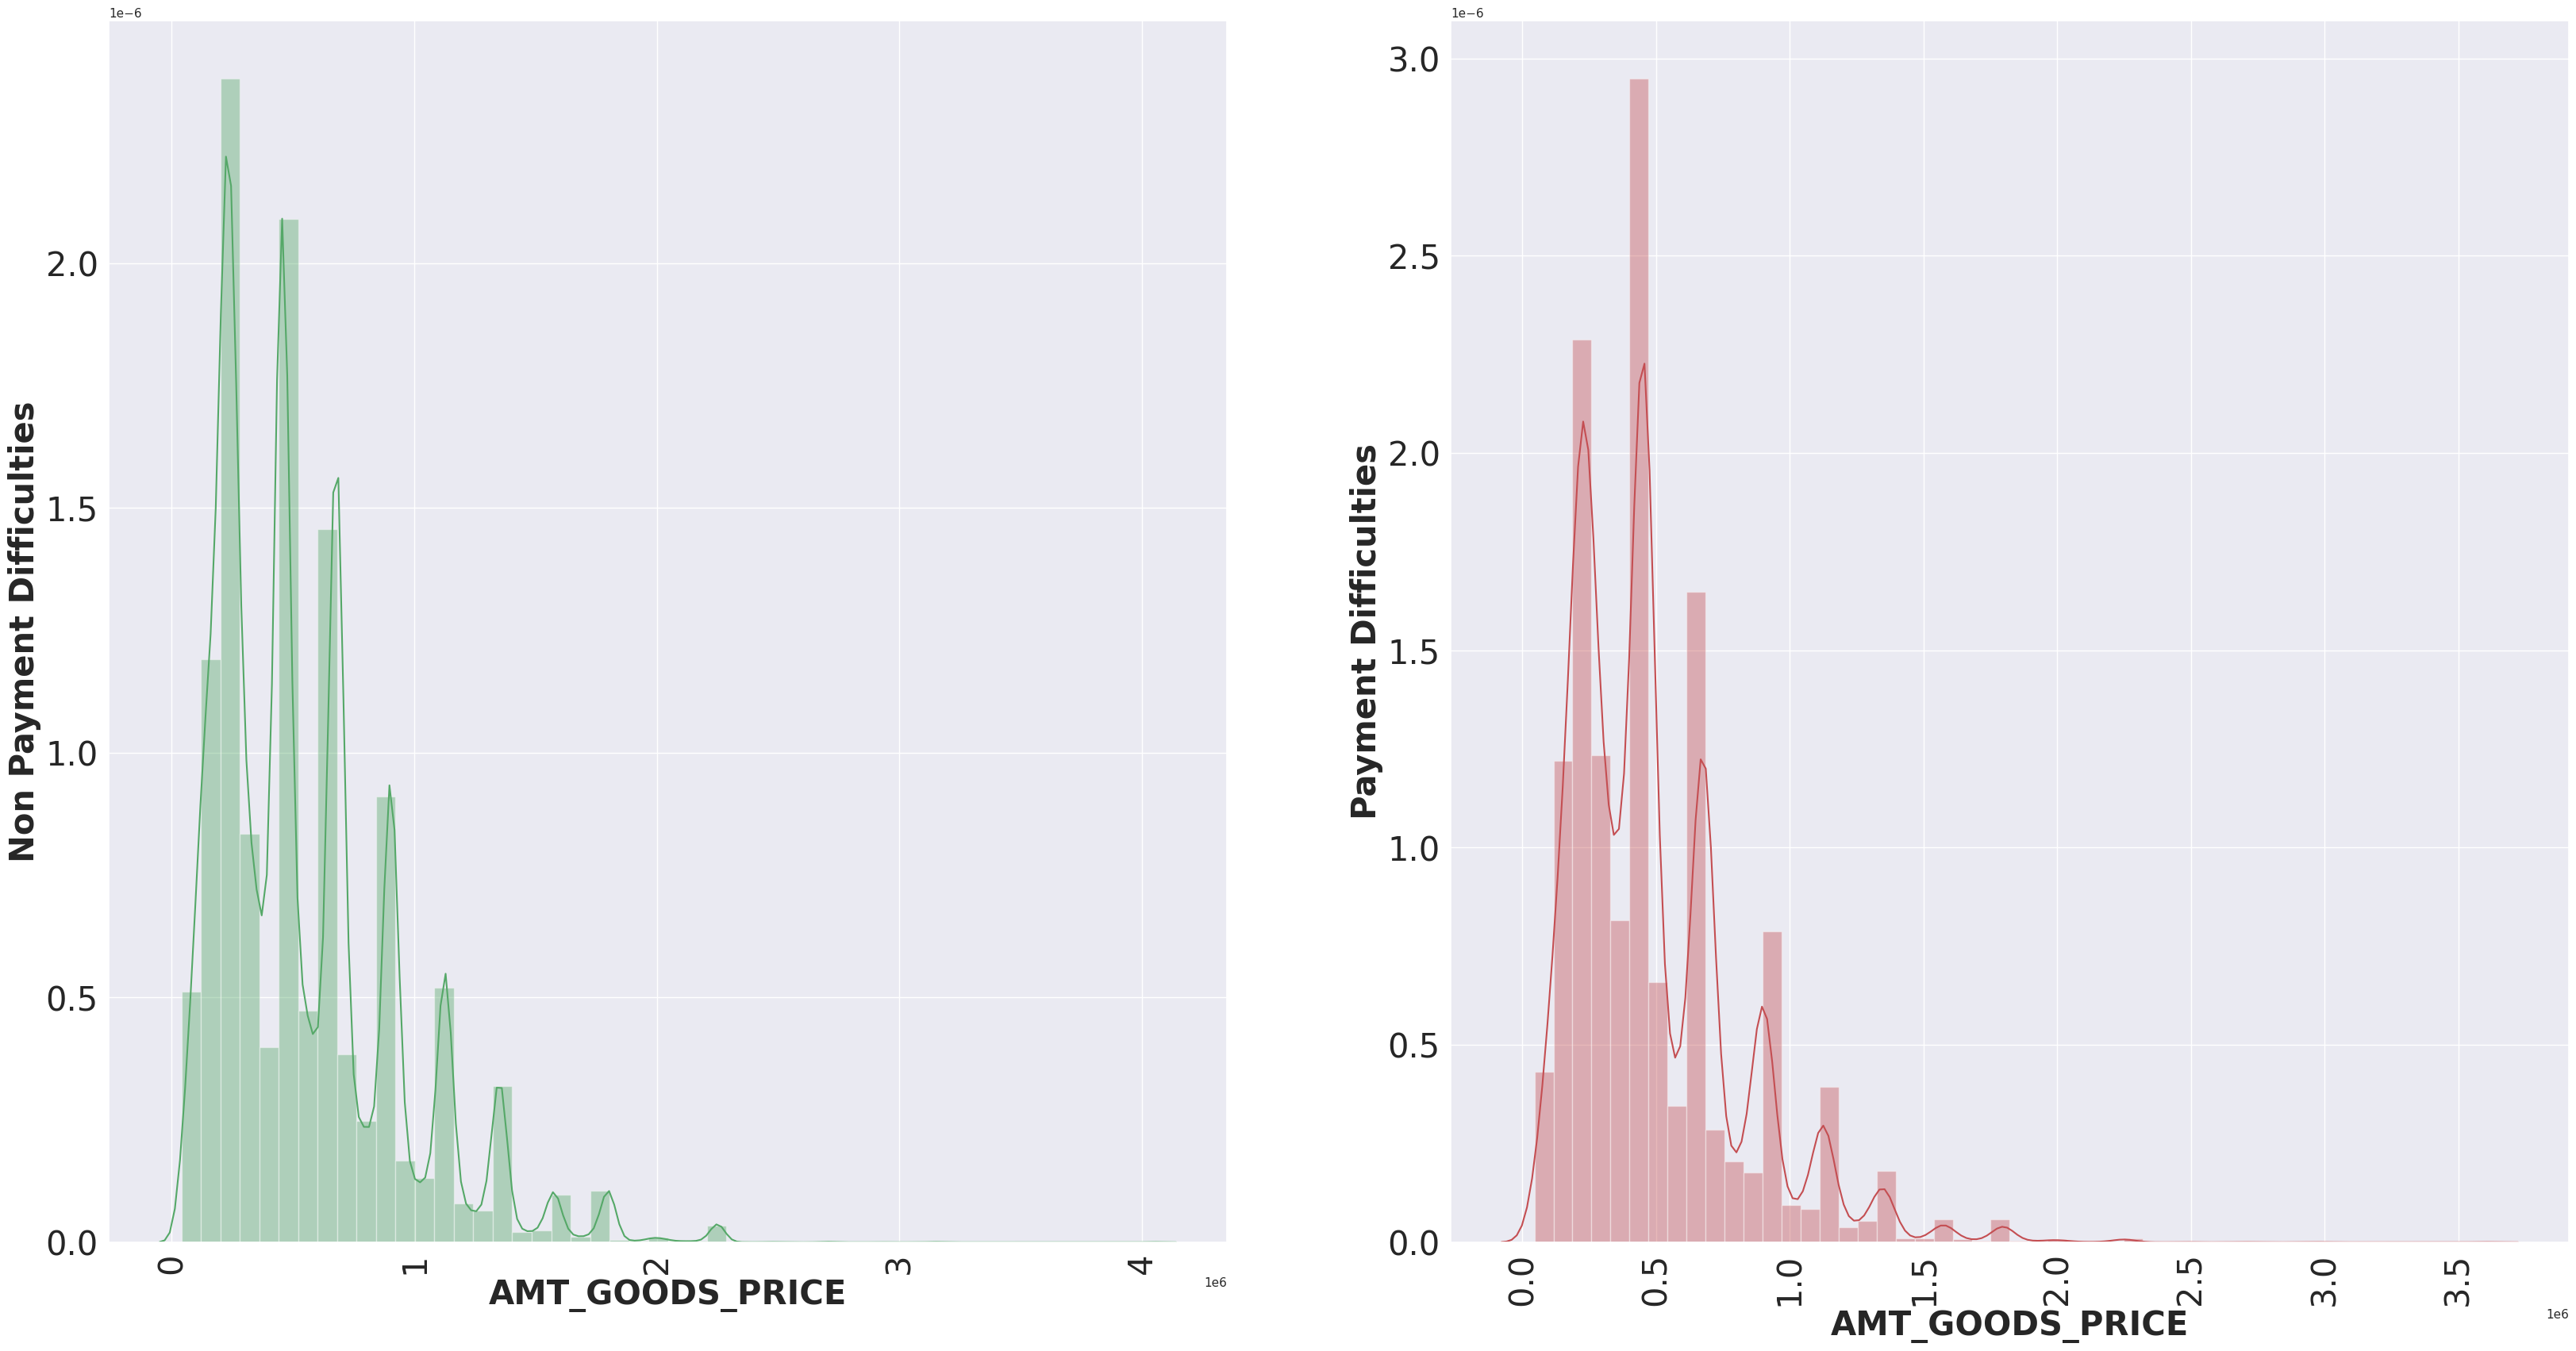

In [151]:
uni(col='AMT_GOODS_PRICE')


<ipython-input-148-46950d9ac816>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-148-46950d9ac816>:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




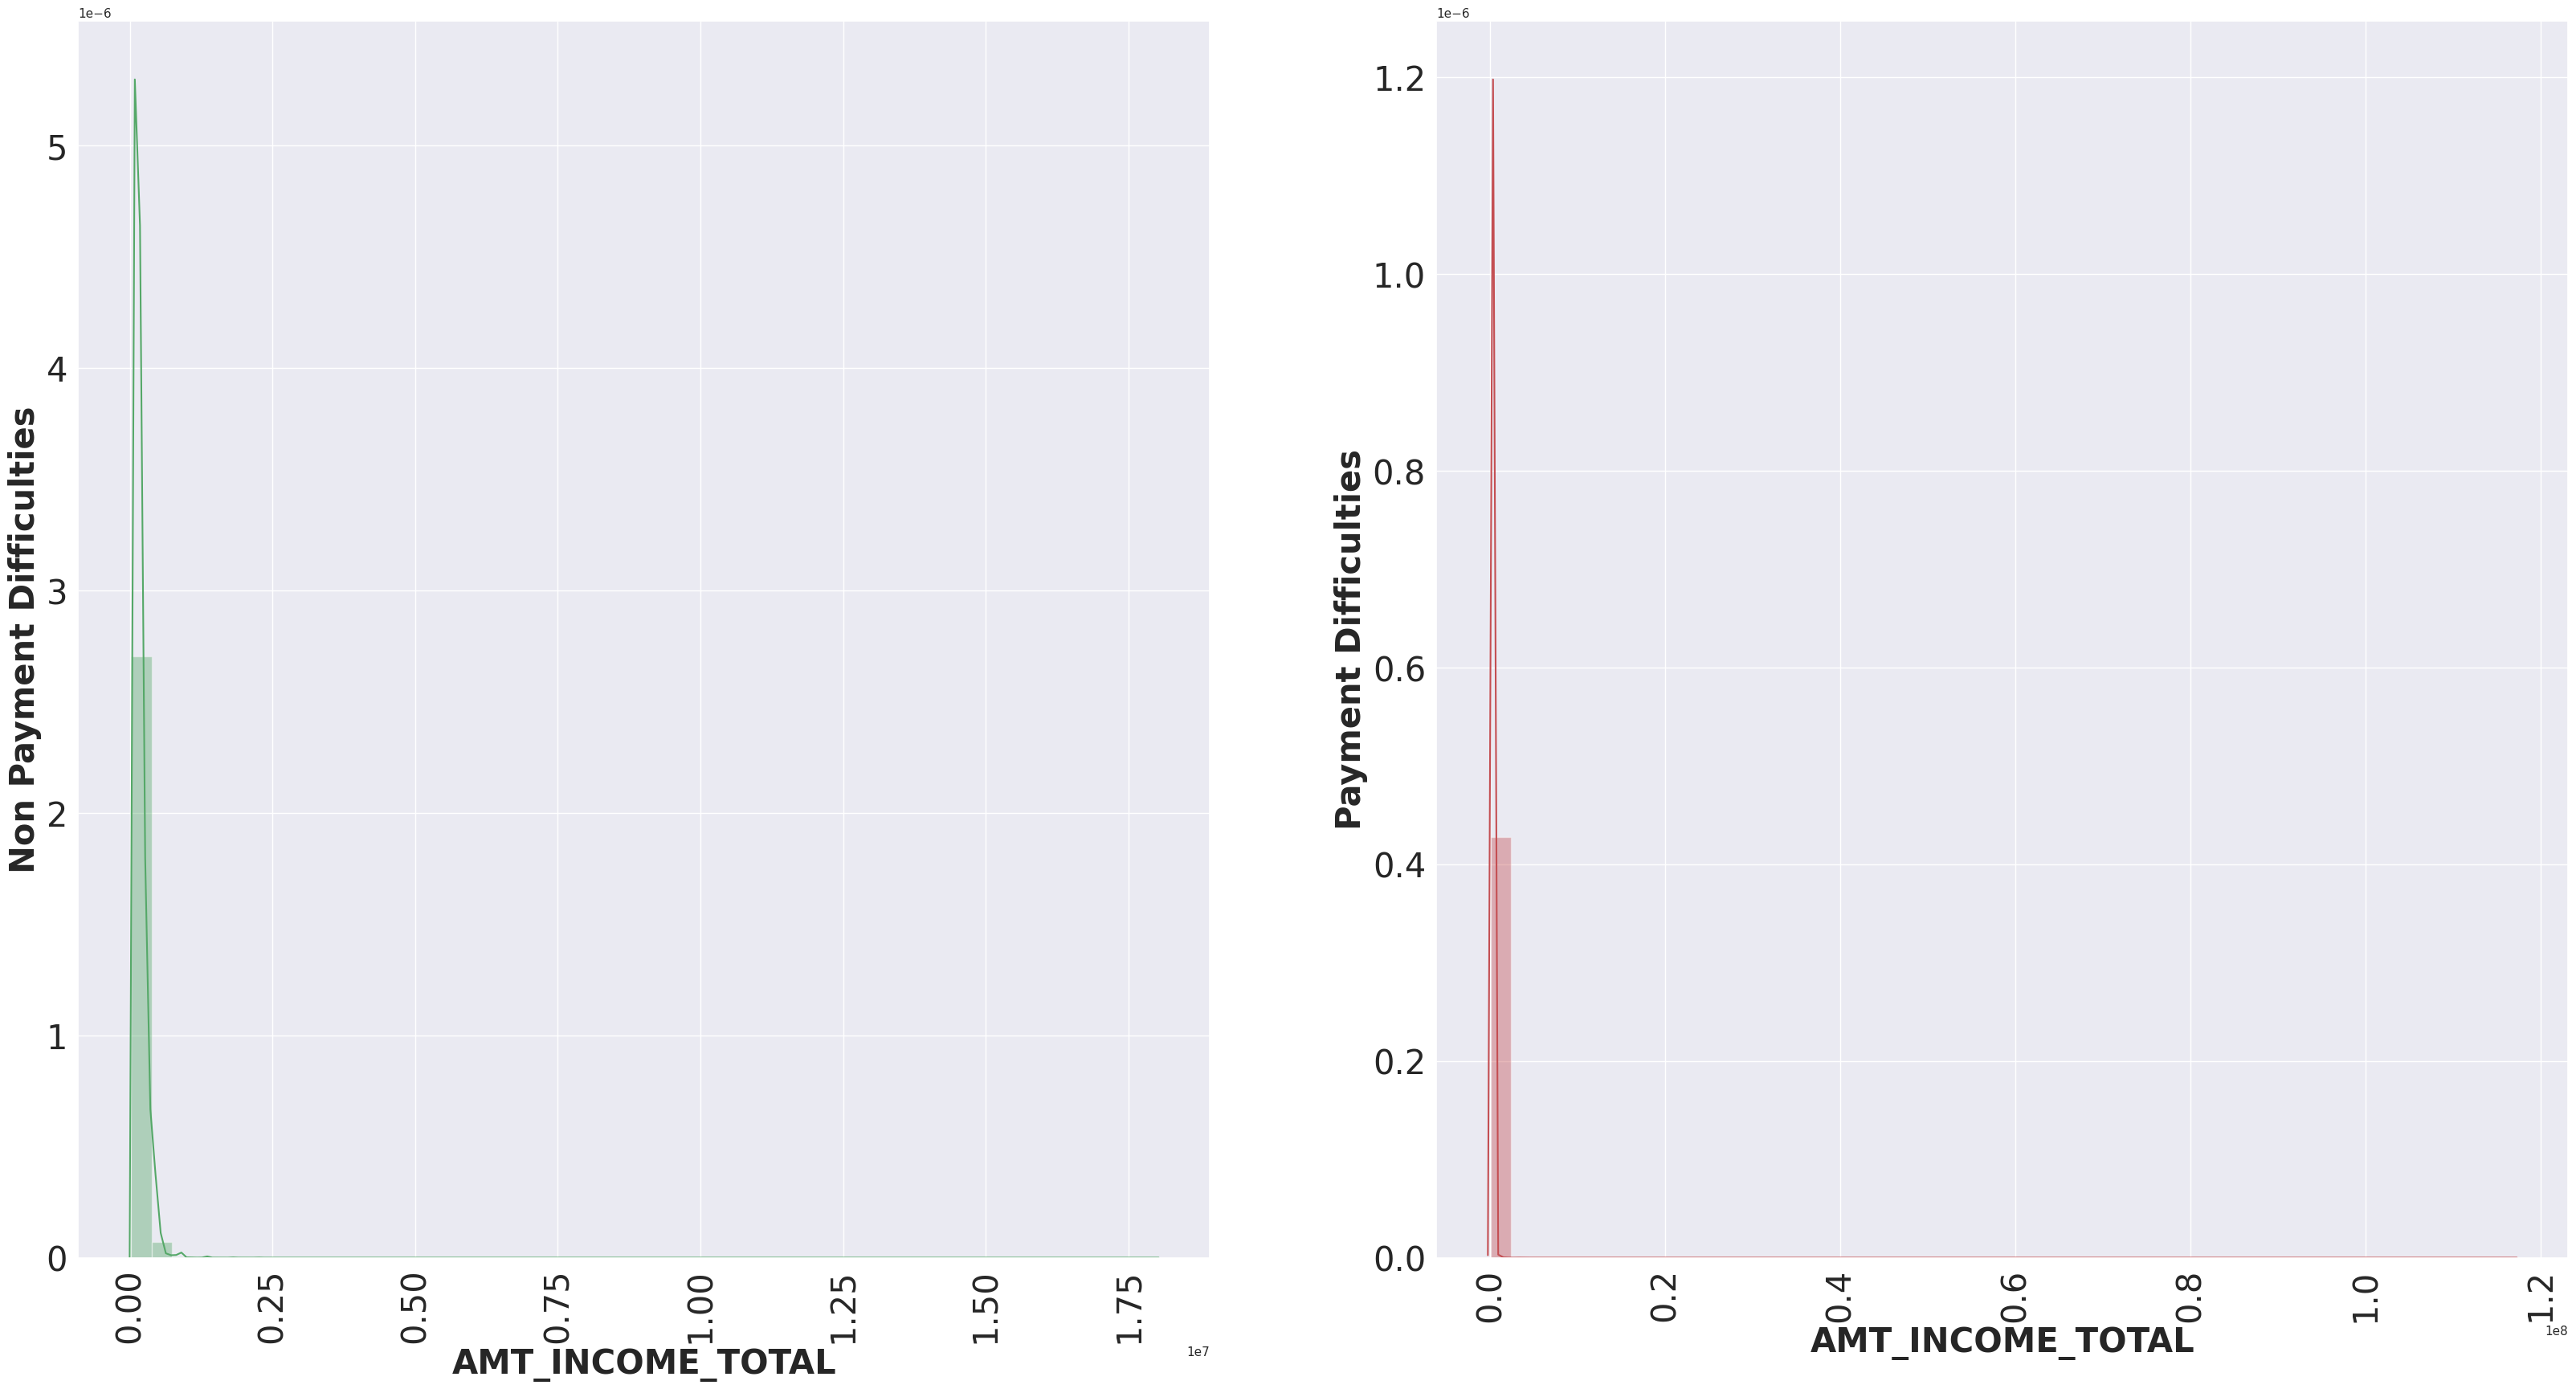

In [152]:
uni(col='AMT_INCOME_TOTAL')


In [153]:
app[["TARGET","AMT_INCOME_TOTAL","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS"]]

TARGET  AMT_INCOME_TOTAL            NAME_EDUCATION_TYPE  \
0            1          202500.0  Secondary / secondary special   
1            0          270000.0               Higher education   
2            0           67500.0  Secondary / secondary special   
3            0          135000.0  Secondary / secondary special   
4            0          121500.0  Secondary / secondary special   
...        ...               ...                            ...   
307506       0          157500.0  Secondary / secondary special   
307507       0           72000.0  Secondary / secondary special   
307508       0          153000.0               Higher education   
307509       1          171000.0  Secondary / secondary special   
307510       0          157500.0               Higher education   

          NAME_FAMILY_STATUS  
0       Single / not married  
1                    Married  
2       Single / not married  
3             Civil marriage  
4       Single / not married  
...                      ...  
307506             Separated  
307507                 Widow  
307508             Separated  
307509               Married  
307510               Married  

[307511 rows x 4 columns]

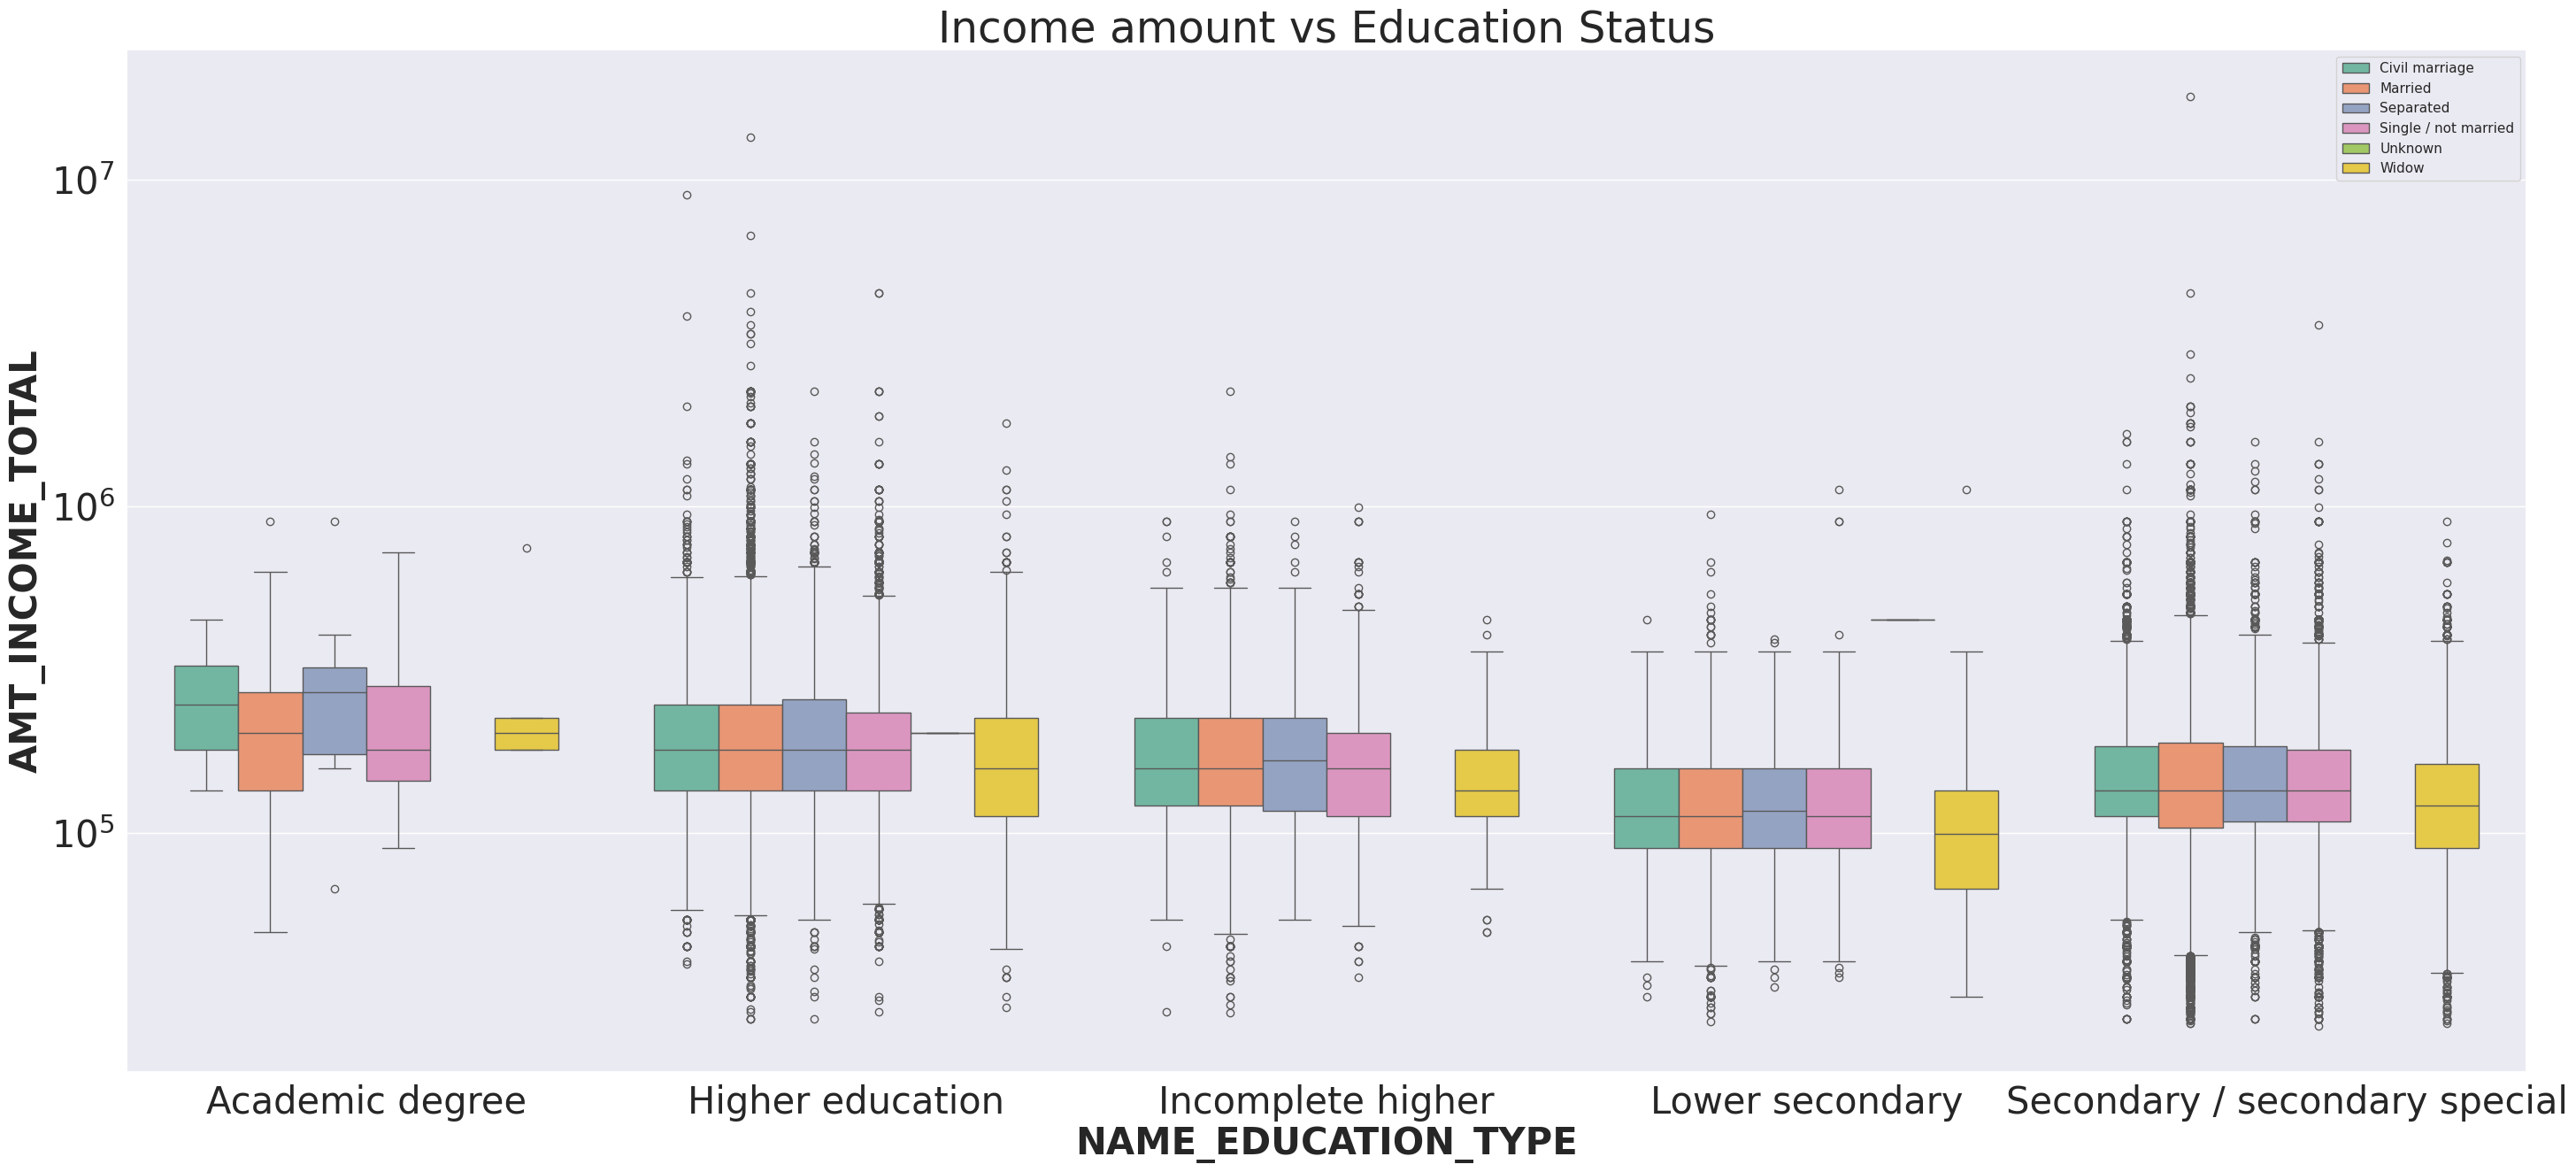

In [199]:
plt.figure(figsize=(35,15))
plt.yscale('log')                     #As the values are too large, it is convinient to use log for better analysis
plt.xticks(rotation = 45)


sns.boxplot(data =Target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',   #Boxplot w.r.t Data Target 0
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


plt.legend( loc = 'upper right')                                              #Adjusting legend position
plt.title('Income amount vs Education Status',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.xticks(rotation=0, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

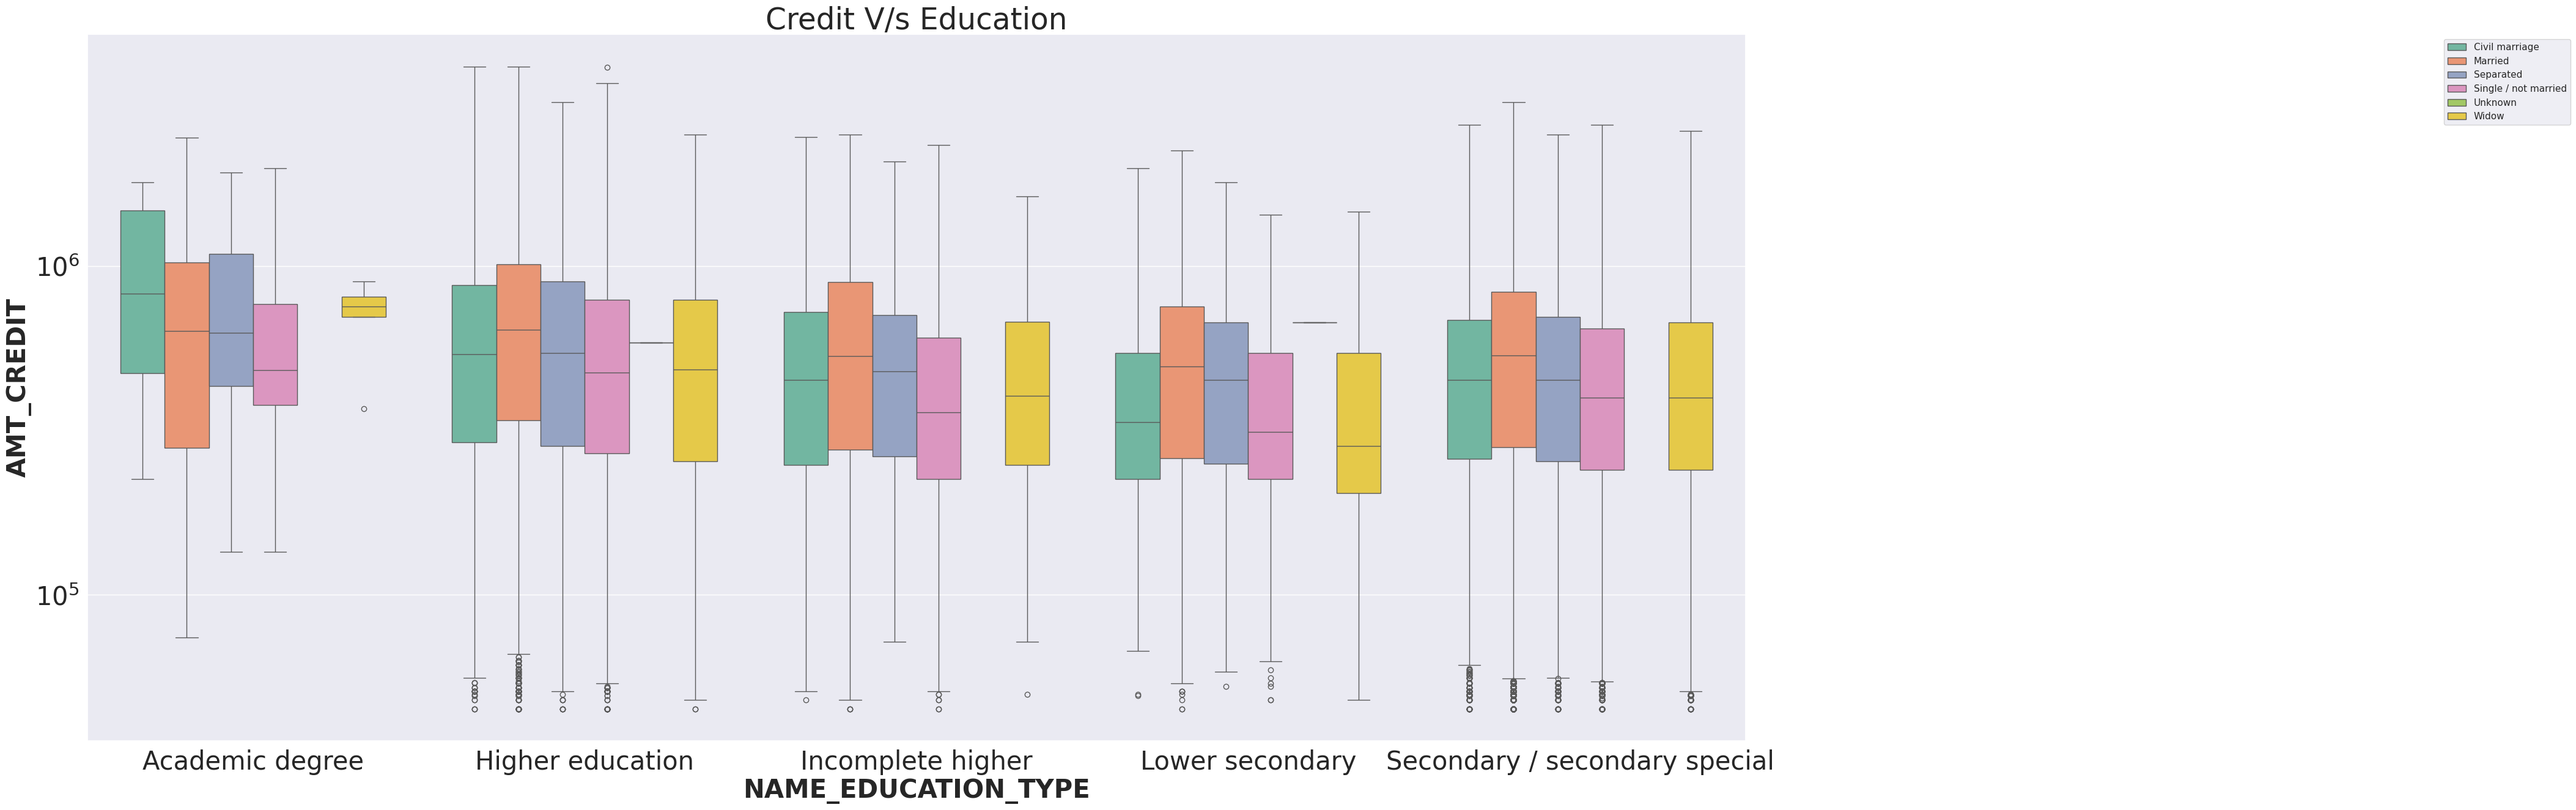

In [205]:
plt.figure(figsize=(35,15))
plt.yscale('log')                      #As the values are too large, it is convinient to use log for better analysis
plt.xticks(rotation = 90)


sns.boxplot(data =Target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',           #Boxplot w.r.t Data Target 0
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


plt.legend( bbox_to_anchor=(1.5, 1),loc = 'upper right')            #Adjusting legend position
plt.title('Credit V/s Education',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_CREDIT",fontsize= 30, fontweight="bold")
plt.xticks(rotation=0, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

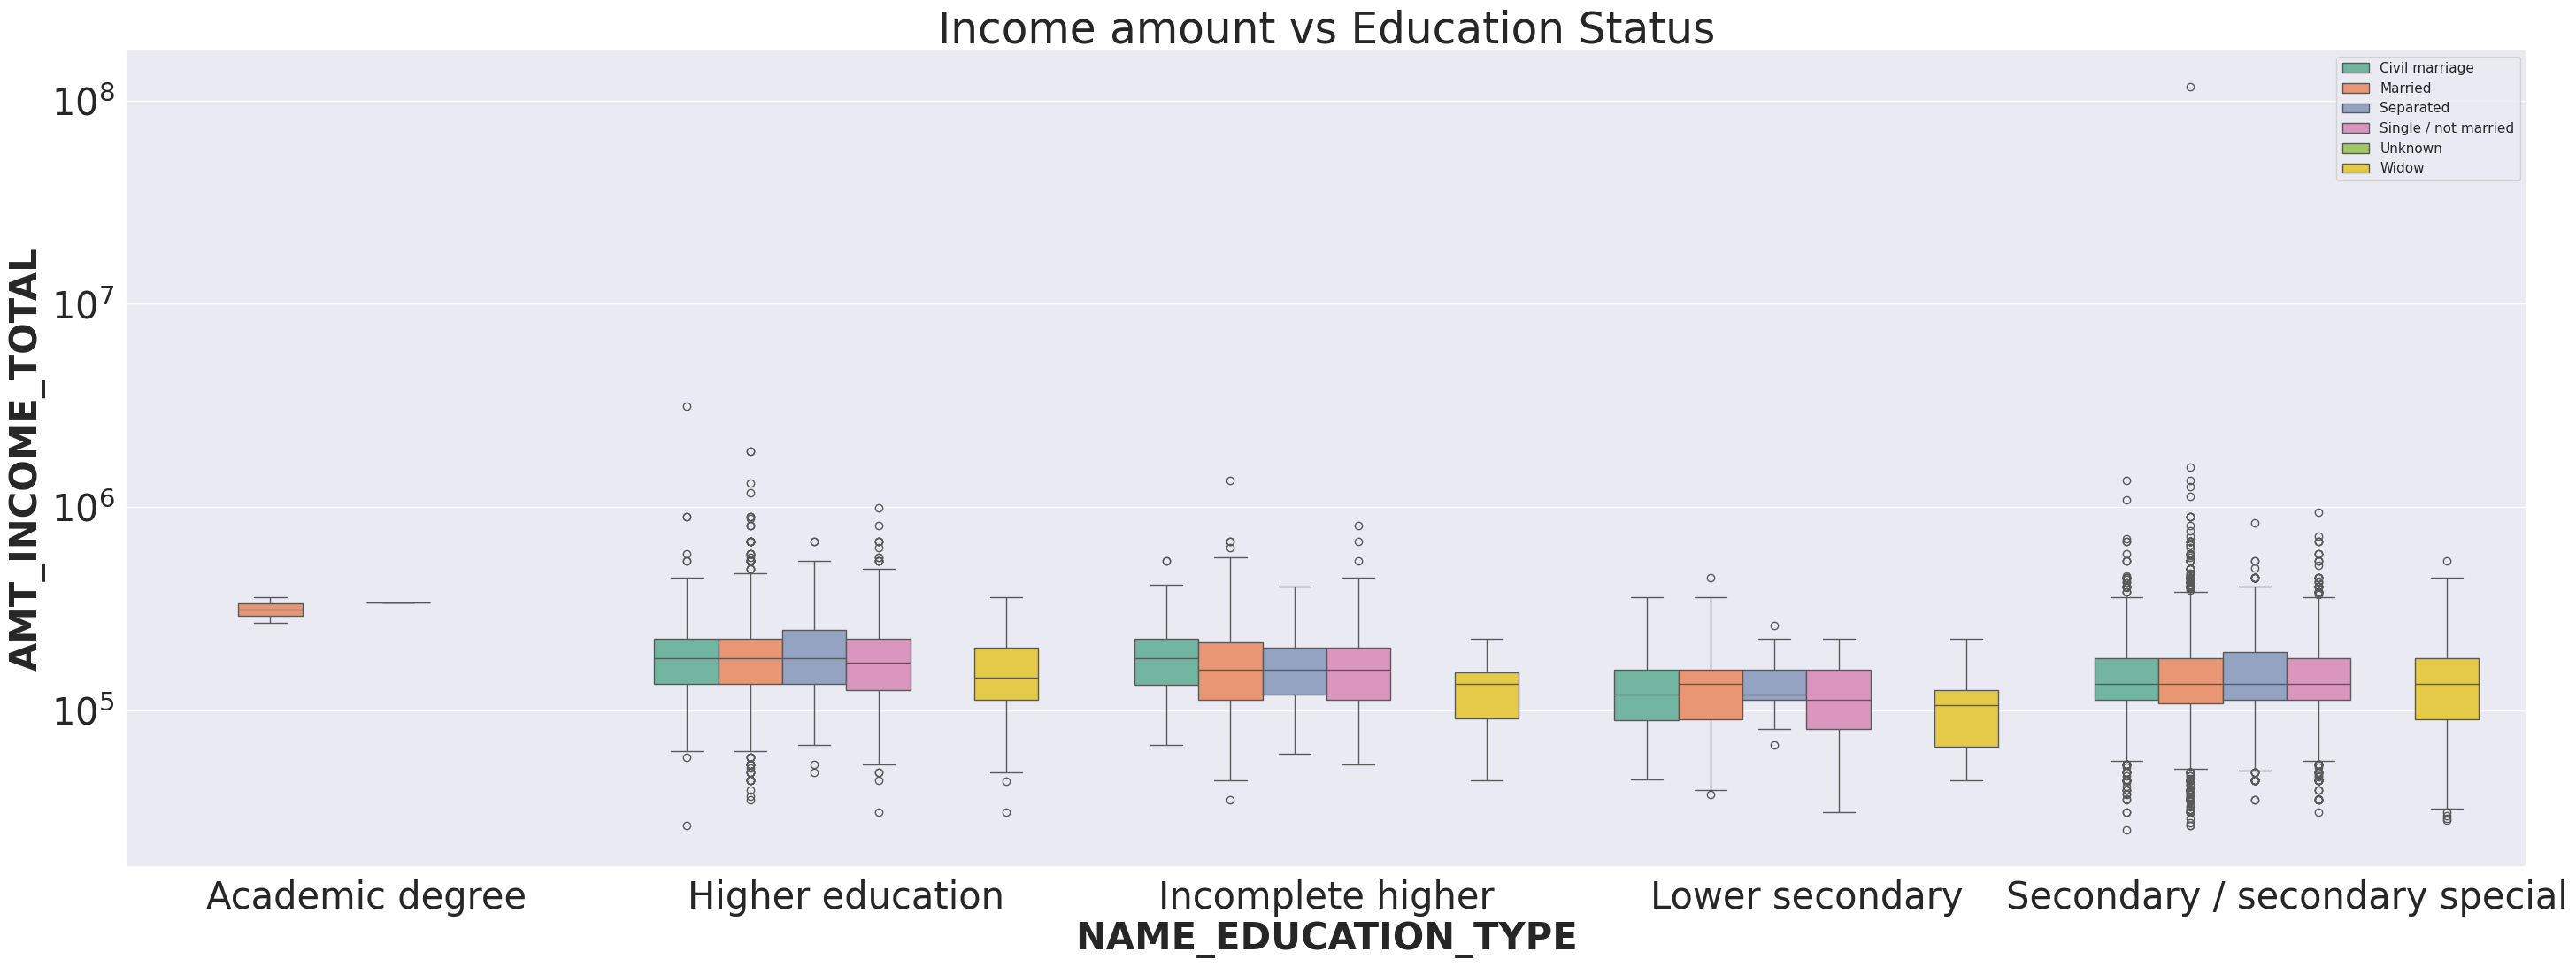

In [206]:
plt.figure(figsize=(35,12))
plt.yscale('log')                     #As the values are too large, it is convinient to use log for better analysis
plt.xticks(rotation = 90)


sns.boxplot(data =Target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',   #Boxplot w.r.t Data Target 1
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


plt.legend( loc = 'upper right')                                              #Adjusting legend position
plt.title('Income amount vs Education Status',fontsize= 35)
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.xticks(rotation=0, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

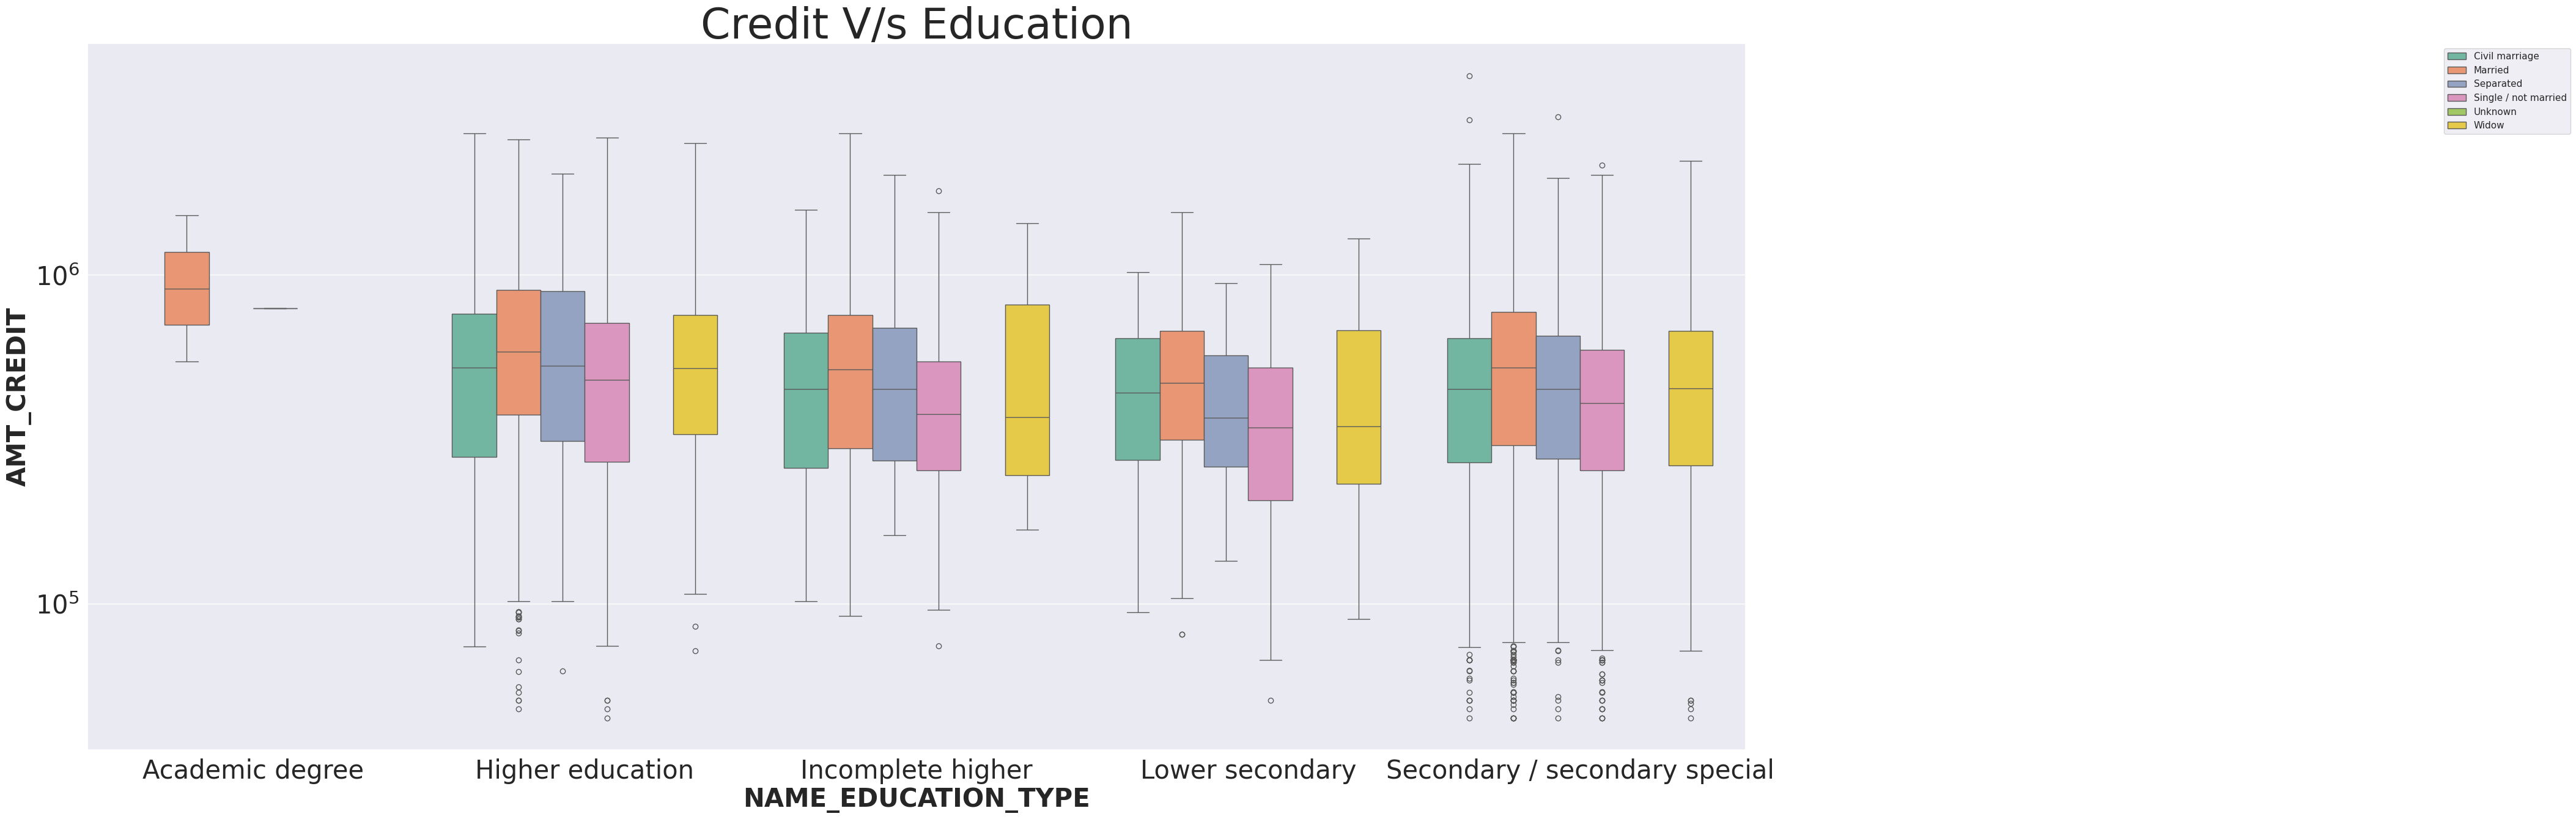

In [211]:
plt.figure(figsize=(35,15))               #As the values are too large, it is convinient to use log for better analysis
plt.yscale('log')
plt.xticks(rotation = 90)


sns.boxplot(data =Target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',      #Boxplot w.r.t Data Target 1
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')



plt.legend( bbox_to_anchor=(1.5, 1),loc = 'upper right')              #Adjusting legend position
plt.title('Credit V/s Education',fontsize=50 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_CREDIT",fontsize= 30, fontweight="bold")
plt.xticks(rotation=0, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

In [158]:
def biplot(df,feature,title):
    temp = df[feature].value_counts()

# Calculate the percentage of target=1 per category value

    perc = df[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    perc.sort_values(by='TARGET', ascending=False, inplace=True)
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=("Count of "+ title,"% of Loan Payment difficulties within each category"))
    fig.add_trace(go.Bar(x=temp.index, y=temp.values),row=1, col=1)
    fig.add_trace(go.Bar(x=perc[feature].to_list(), y=perc['TARGET'].to_list()),row=1, col=2)
    fig['layout']['xaxis']['title']=feature
    fig['layout']['xaxis2']['title']=feature
    fig['layout']['yaxis']['title']='Count'
    fig['layout']['yaxis2']['title']='% of Loan Payment Difficulties'
    fig.update_layout(height=600, width=1000, title_text=title, showlegend=False)
    fig.show()

In [159]:
biplot(app ,'AMT_INCOME_TYPE','AMT_INCOME_RANGE')

In [160]:
biplot(app ,'NAME_INCOME_TYPE','Income type')

In [161]:
biplot(app ,'NAME_CONTRACT_TYPE','Contract type')

In [162]:
biplot(app,'NAME_EDUCATION_TYPE','Education type')

In [163]:
biplot(app,'NAME_HOUSING_TYPE','Housing type')

In [164]:
biplot(app,'OCCUPATION_TYPE','Occupation type')

In [165]:
table= pd.pivot_table(app, values='TARGET', index=['CODE_GENDER','AMT_INCOME_TYPE'],columns=['NAME_EDUCATION_TYPE'], aggfunc=np.mean)
table

NAME_EDUCATION_TYPE          Academic degree  Higher education  \
CODE_GENDER AMT_INCOME_TYPE                                      
F           very low                0.000000          0.056068   
            low                     0.000000          0.049022   
            medium                  0.000000          0.050254   
            high                    0.105263          0.041516   
            very high               0.076923          0.037289   
M           very low                0.000000          0.080411   
            low                     0.000000          0.073305   
            medium                  0.000000          0.070086   
            high                    0.000000          0.055911   
            very high               0.000000          0.044080   

NAME_EDUCATION_TYPE          Incomplete higher  Lower secondary  \
CODE_GENDER AMT_INCOME_TYPE                                       
F           very low                  0.086399         0.080193   
            low                       0.080075         0.113889   
            medium                    0.078431         0.096983   
            high                      0.074313         0.038961   
            very high                 0.082251         0.066667   
M           very low                  0.123967         0.125000   
            low                       0.097778         0.142857   
            medium                    0.095130         0.150515   
            high                      0.074627         0.081633   
            very high                 0.077586         0.064516   

NAME_EDUCATION_TYPE          Secondary / secondary special  
CODE_GENDER AMT_INCOME_TYPE                                 
F           very low                              0.076778  
            low                                   0.079523  
            medium                                0.075692  
            high                                  0.070736  
            very high                             0.065930  
M           very low                              0.118066  
            low                                   0.123693  
            medium                                0.113466  
            high                                  0.093484  
            very high                             0.089939

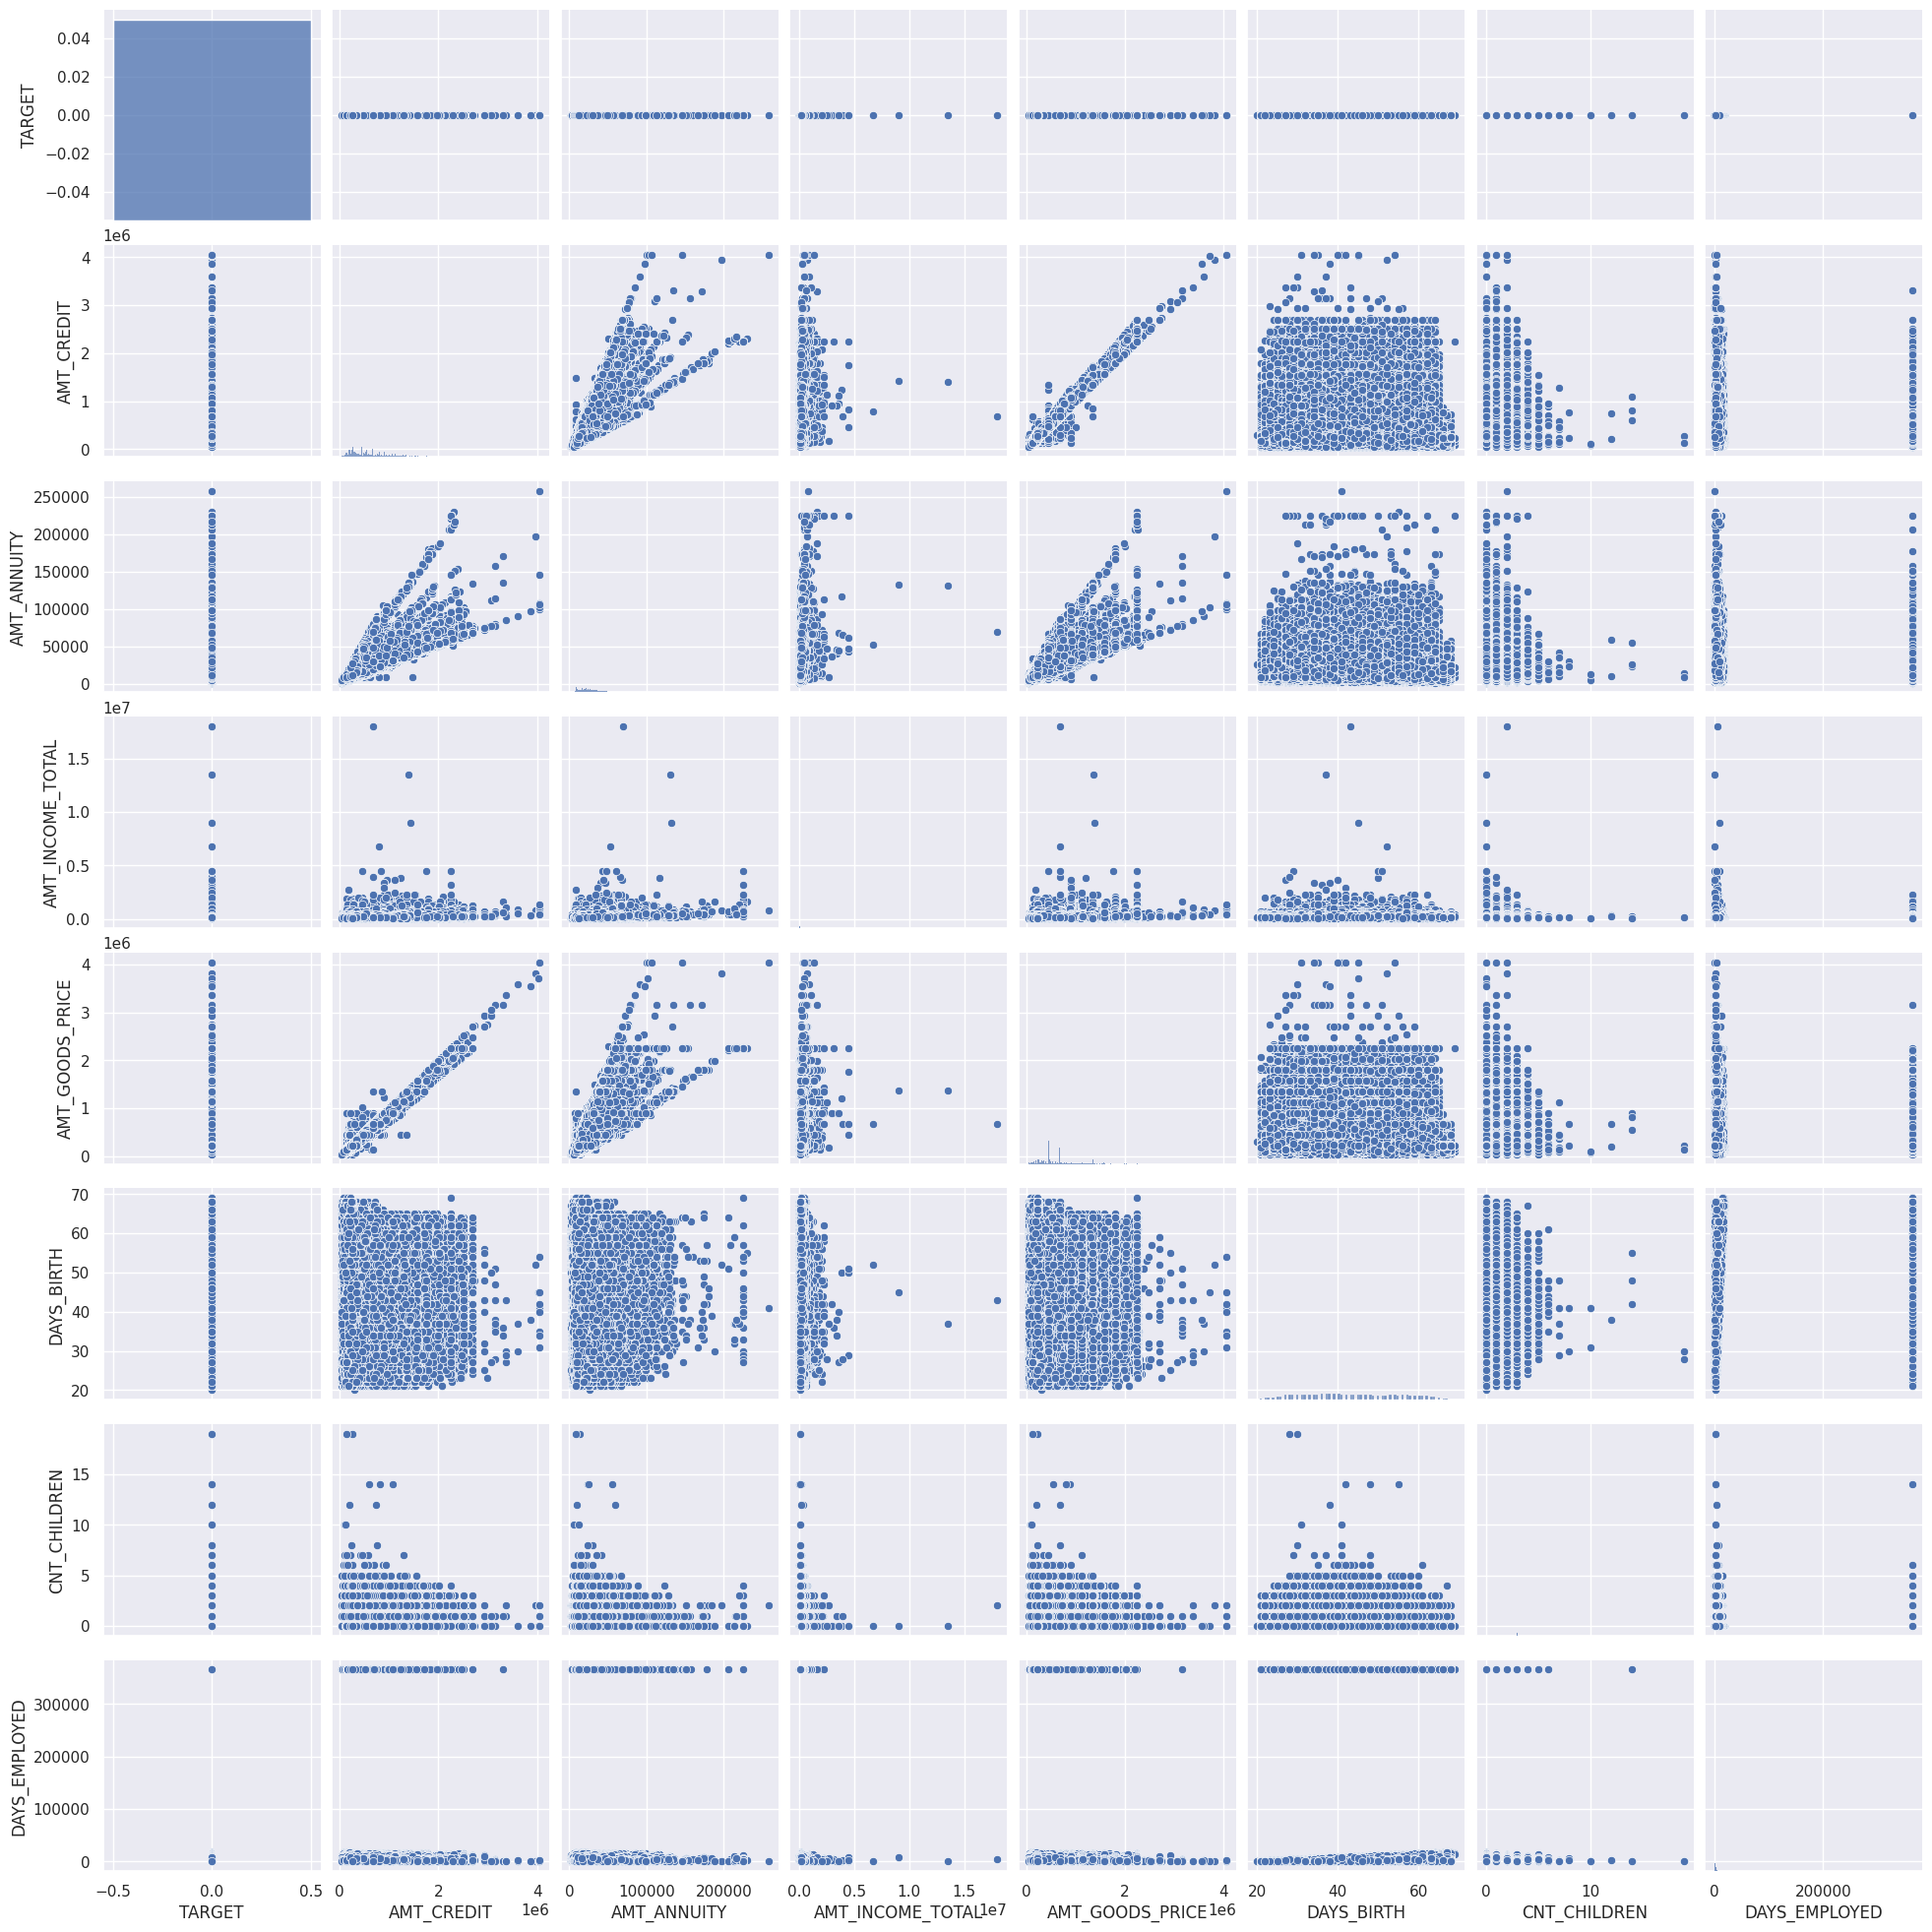

In [166]:
pair = Target0[['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].fillna(0)
sns.pairplot(pair)

plt.show()

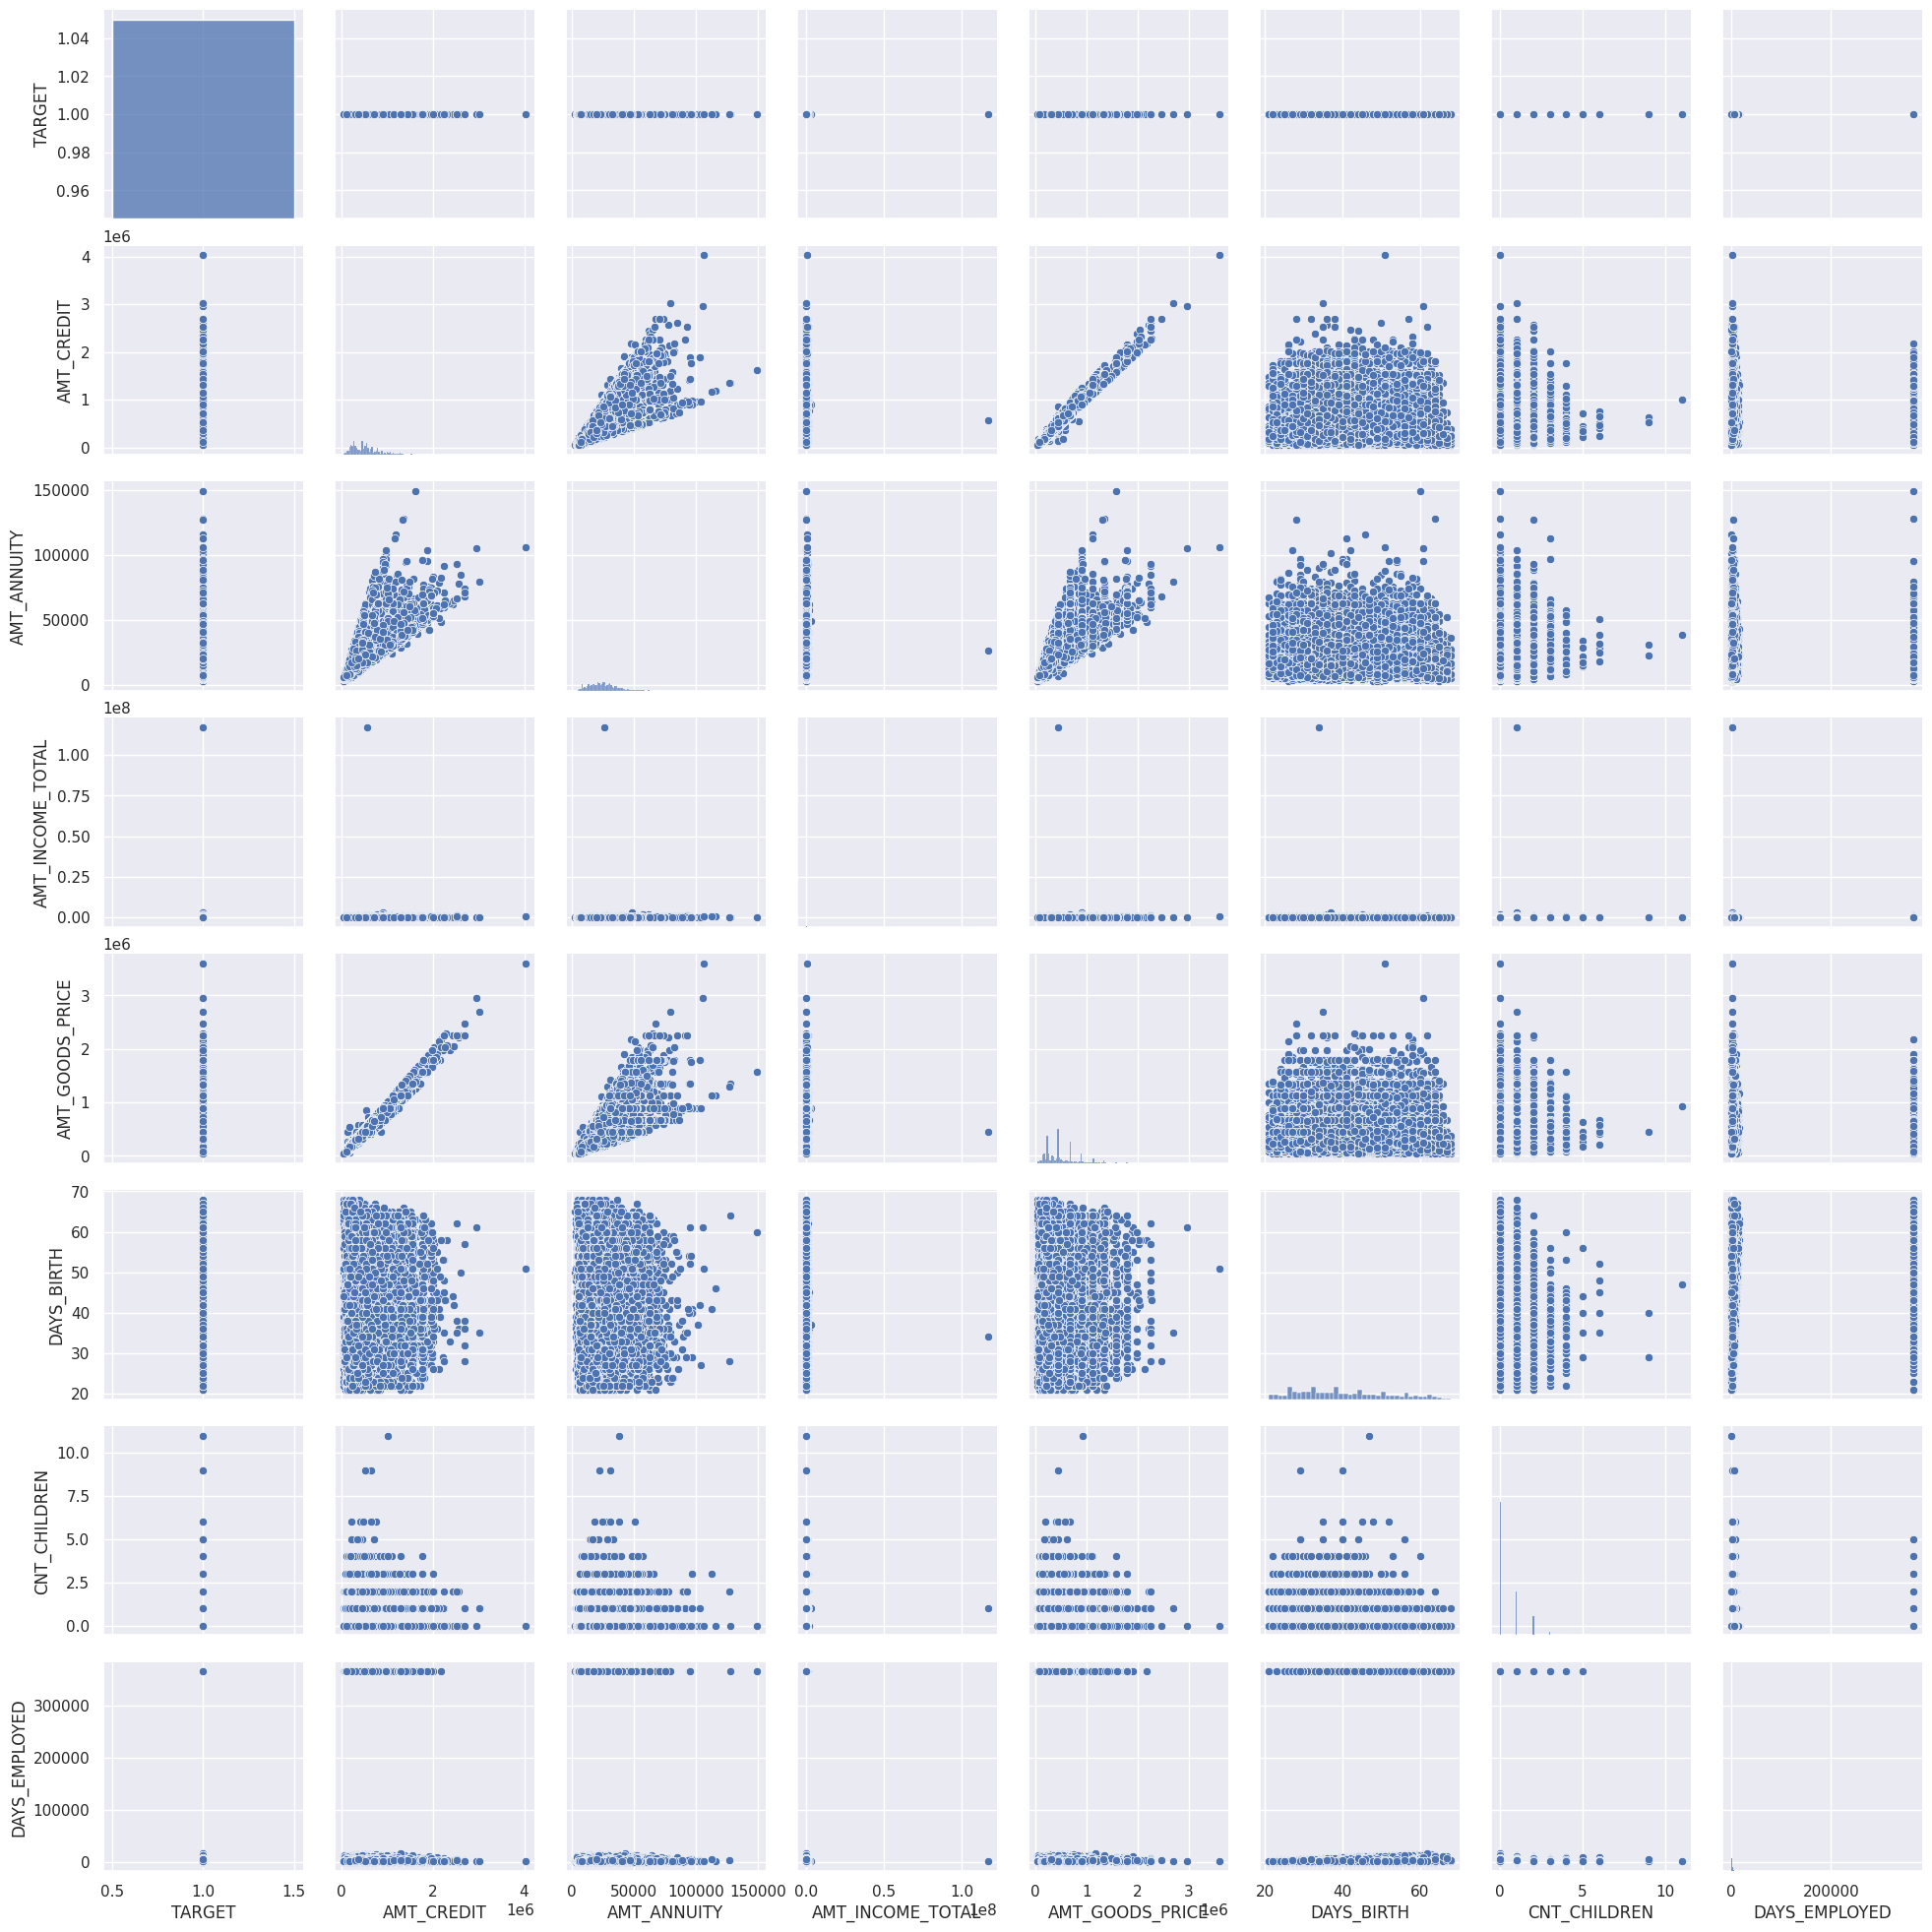

In [167]:
pair = Target1[['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].fillna(0)
sns.pairplot(pair)

plt.show()

# Previous Application Analysis

#### Checking the null values

In [168]:
null_col_prev= (papp.isnull().sum()/len(papp)* 100 ) .sort_values(ascending=False)
null_col_prev

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

#### Null values greater than 0

In [169]:
null_col_prev[null_col_prev > 0]

RATE_INTEREST_PRIVILEGED     99.643698
RATE_INTEREST_PRIMARY        99.643698
AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
NAME_TYPE_SUITE              49.119754
NFLAG_INSURED_ON_APPROVAL    40.298129
DAYS_TERMINATION             40.298129
DAYS_LAST_DUE                40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_FIRST_DUE               40.298129
DAYS_FIRST_DRAWING           40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
AMT_CREDIT                    0.000060
dtype: float64

In [170]:
null_col_prev=papp.isnull().sum()/len(null_col_prev)*100
null_col_prev[null_col_prev >0]

AMT_ANNUITY                  1.006041e+06
AMT_CREDIT                   2.702703e+00
AMT_DOWN_PAYMENT             2.421200e+06
AMT_GOODS_PRICE              1.041932e+06
RATE_DOWN_PAYMENT            2.421200e+06
RATE_INTEREST_PRIMARY        4.498008e+06
RATE_INTEREST_PRIVILEGED     4.498008e+06
NAME_TYPE_SUITE              2.217311e+06
CNT_PAYMENT                  1.006027e+06
PRODUCT_COMBINATION          9.351351e+02
DAYS_FIRST_DRAWING           1.819095e+06
DAYS_FIRST_DUE               1.819095e+06
DAYS_LAST_DUE_1ST_VERSION    1.819095e+06
DAYS_LAST_DUE                1.819095e+06
DAYS_TERMINATION             1.819095e+06
NFLAG_INSURED_ON_APPROVAL    1.819095e+06
dtype: float64

#### Dimension of Previous Data

In [171]:
drop_col_prev=papp.columns[papp.isnull().sum()/papp.shape[0]*100 > 40]
papp.drop(columns=drop_col_prev,inplace=True)
papp.shape

(1670214, 26)

In [172]:
null_col_prev=papp.isnull().sum()/null_col_prev.shape[0]*100
null_col_prev[null_col_prev> 0]

AMT_ANNUITY            1.006041e+06
AMT_CREDIT             2.702703e+00
AMT_GOODS_PRICE        1.041932e+06
CNT_PAYMENT            1.006027e+06
PRODUCT_COMBINATION    9.351351e+02
dtype: float64

In [173]:
papp.shape

(1670214, 26)

In [174]:
papp['AMT_ANNUITY']

0           1730.430
1          25188.615
2          15060.735
3          47041.335
4          31924.395
             ...    
1670209    14704.290
1670210     6622.020
1670211    11520.855
1670212    18821.520
1670213    16431.300
Name: AMT_ANNUITY, Length: 1670214, dtype: float64

In [175]:
# Define the list of specified values
specified_values = ["Canceled", "Refused", "Unused offer"]
papp.loc[papp['NAME_CONTRACT_STATUS'].isin(specified_values), 'AMT_ANNUITY'] = 0
papp.shape
(1670214, 26)

(1670214, 26)

In [176]:
papp.loc[papp['NAME_CONTRACT_STATUS'].isin(specified_values), 'AMT_ANNUITY'].values


array([0., 0., 0., ..., 0., 0., 0.])

In [177]:
papp['AMT_ANNUITY'].fillna(papp['AMT_ANNUITY'].median(),inplace=True)

In [178]:
papp['PRODUCT_COMBINATION'].mode()[0]

'Cash'

In [179]:
papp['PRODUCT_COMBINATION'].fillna(papp['PRODUCT_COMBINATION'].mode()[0],inplace=True)

In [180]:
papp['PRODUCT_COMBINATION'].isnull().sum()

0

In [181]:
papp["AMT_GOODS_PRICE"].fillna(papp["AMT_GOODS_PRICE"].median(),inplace=True)
papp["AMT_GOODS_PRICE"].isnull().sum()

0

In [182]:
missing_payment_prev = papp[papp['CNT_PAYMENT'].isnull() | (papp['CNT_PAYMENT'] == 0)]

# Examine unique values in NAME_CONTRACT_STATUS
status_counts1 = missing_payment_prev['NAME_CONTRACT_STATUS'].value_counts()
print(status_counts1)

NAME_CONTRACT_STATUS
Canceled        306278
Approved         97775
Refused          87636
Unused offer     25526
Name: count, dtype: int64


In [183]:
papp['CNT_PAYMENT'].fillna(0, inplace=True)

In [184]:
null_col_prev=null_col_prev.isnull().sum()/len(papp)*100
null_col_prev[null_col_prev >0]


array([], dtype=float64)

In [186]:
(papp.isnull().sum() / len(papp) * 100 ).sort_values(ascending=False).head(50)

AMT_CREDIT                     0.00006
SK_ID_PREV                     0.00000
NAME_PAYMENT_TYPE              0.00000
NAME_YIELD_GROUP               0.00000
CNT_PAYMENT                    0.00000
NAME_SELLER_INDUSTRY           0.00000
SELLERPLACE_AREA               0.00000
CHANNEL_TYPE                   0.00000
NAME_PRODUCT_TYPE              0.00000
NAME_PORTFOLIO                 0.00000
NAME_GOODS_CATEGORY            0.00000
NAME_CLIENT_TYPE               0.00000
CODE_REJECT_REASON             0.00000
DAYS_DECISION                  0.00000
SK_ID_CURR                     0.00000
NAME_CONTRACT_STATUS           0.00000
NAME_CASH_LOAN_PURPOSE         0.00000
NFLAG_LAST_APPL_IN_DAY         0.00000
FLAG_LAST_APPL_PER_CONTRACT    0.00000
HOUR_APPR_PROCESS_START        0.00000
WEEKDAY_APPR_PROCESS_START     0.00000
AMT_GOODS_PRICE                0.00000
AMT_APPLICATION                0.00000
AMT_ANNUITY                    0.00000
NAME_CONTRACT_TYPE             0.00000
PRODUCT_COMBINATION      

## Data Visualization

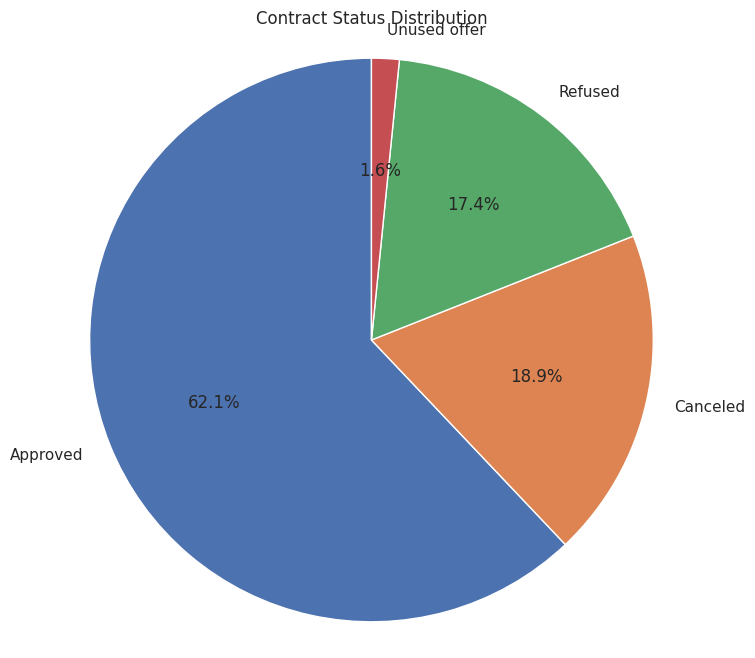

In [212]:
data = papp['NAME_CONTRACT_STATUS'].value_counts()

# Create a Pie chart
plt.figure(figsize=(8, 8))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle

plt.axis('equal')
plt.title('Contract Status Distribution')
plt.show()

In [188]:
analysis_final=pd.merge(app,papp,on="SK_ID_CURR",how="inner")
null_col=analysis_final.isnull().sum()/analysis_final.shape[0]*100
null_col[null_col>0]

AMT_CREDIT_y    0.000071
dtype: float64

In [189]:
analysis_final.shape

(1413701, 74)

In [190]:
analysis_final.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START_x',
       'HOUR_APPR_PROCESS_START_x', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CR

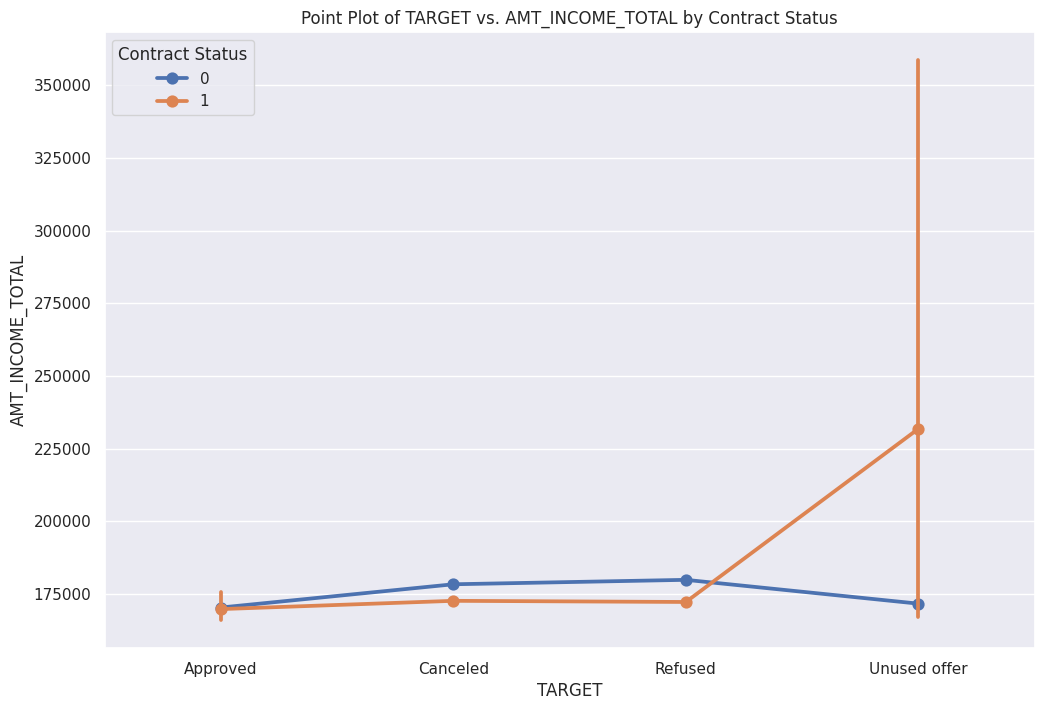

In [191]:
plt.figure(figsize=(12, 8))
sns.pointplot(data=analysis_final, x="NAME_CONTRACT_STATUS", y="AMT_INCOME_TOTAL", hue="TARGET")

# Customize the plot
plt.title("Point Plot of TARGET vs. AMT_INCOME_TOTAL by Contract Status")
plt.xlabel("TARGET")
plt.ylabel("AMT_INCOME_TOTAL")
plt.legend(title="Contract Status")

# Show the plot
plt.show()

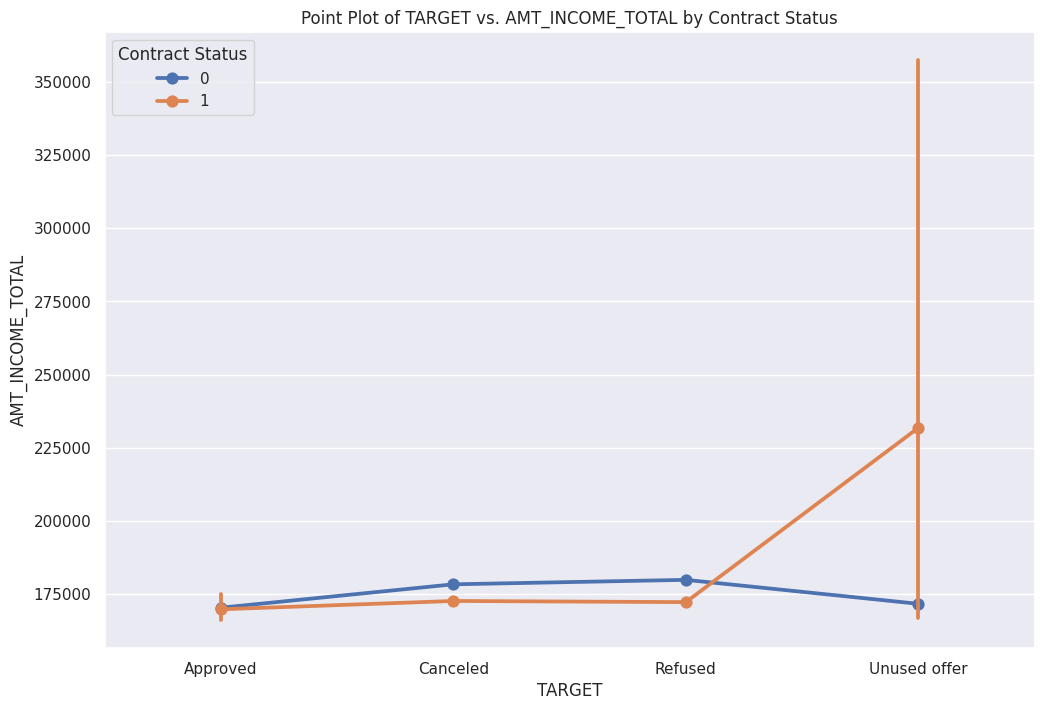

In [192]:
plt.figure(figsize=(12, 8))
sns.pointplot(data=analysis_final, x="NAME_CONTRACT_STATUS", y="AMT_INCOME_TOTAL", hue="TARGET")

# Customize the plot
plt.title("Point Plot of TARGET vs. AMT_INCOME_TOTAL by Contract Status")
plt.xlabel("TARGET")
plt.ylabel("AMT_INCOME_TOTAL")
plt.legend(title="Contract Status")

# Show the plot
plt.show()